# RUN AWAY FROM ELISA

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import json
import requests
import geopandas as gpd
import folium
import requests
import random
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import folium 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geocoder # to get coordinates
import contextily as ctx
import math
import pyproj
from geopy.geocoders import Nominatim
import fiona
import random
import geocoder


%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import silhouette_samples, silhouette_score
from shapely.geometry import Point, Polygon
from functools import partial
from shapely.ops import transform
from pyproj import Proj, transform
from geopy.distance        import geodesic

%matplotlib inline 

A function to get a rainbow of colors (will be usufeul in the future).

In [2]:
def get_colors(number):
    x = np.arange(number)
    ys = [i + x + (i*x)**2 for i in range(number)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    colors_list = [mcolors.rgb2hex(i) for i in colors_array]
    return colors_list

In [3]:
pd.set_option('display.max_colwidth',100)
geolocator = Nominatim(timeout=None,user_agent="my-application")

# DATA COLLECTION

## ROME

Import the following .shp file, downloaded by the official website of the 'Comune di Roma', with some information of all municipi of Rome.

In [4]:
rome_municipi = gpd.read_file('ROMA_MUNICIPI/ROMA_MUNICIPI_SHAPE2.shp')
rome_municipi.head()

,MUNICIPIO,DENOMINAZI,COD_NAZ_CO,COD_ISTAT,CITTA,RIONI,QUARTIERI,SUBURBI,ZONE,SEDE_MUNIC,POP2001,POP2011,NOTE,MI_STYLE,MI_PRINX,geometry
0,15,Municipio Roma XV,H501,091,Roma,None,"Della Vittoria , Tor di Quinto","Tor Di Quinto, Della Vittoria","La storta, Cesano,Tomba di Nerone, La Giustiniana,Grotta Rossa,Labaro, Prima Porta, Isola Farnes...","Via Flaminia, 872",146943.0,158222.0,Del.Cons.Comunale del 11/03/2013 - Municipio XV ( Ex Municipio XX ) (Cassia Flaminia),None,16.0,"MULTIPOLYGON (((12.55674 42.05087, 12.55661 42.04925, 12.55589 42.04815, 12.55345 42.04604, 12.5..."
1,CDV,Citta del Vaticano,H501,091,Citta del Vaticano,None,None,None,None,None,0.0,0.0,None,None,1.0,"POLYGON ((12.45639 41.90036, 12.45460 41.90036, 12.45452 41.90019, 12.45435 41.90022, 12.45405 4..."
2,1,Municipio Roma I,H501,091,Roma,"Monti, Trevi, Colonna, Campo Marzio, Ponte, Parione, Regola, S. Eustacchio, Pigna, Campitelli, S...",None,None,None,"Via Luigi Petroselli, 50",197825.0,197258.0,Del.Cons.Comunale del 11/03/2013 - Municipio I ( Ex Municipio I ed ex municipio XVII ) munici...,None,2.0,"POLYGON ((12.51578 41.89285, 12.51542 41.89242, 12.51521 41.89219, 12.51544 41.89179, 12.51516 4..."
3,2,Municipio Roma II,H501,091,Roma,None,"Flaminio, Parioli, Pinciano, Salario, Trieste, Nomentano,Tiburtino",None,None,"Via Dire Daua, 11",181180.0,174211.0,Del.Cons.Comunale del 11/03/2013 - Municipio II ( Ex Municipio II ed ex municipio III ) (Sala...,None,3.0,"POLYGON ((12.50480 41.90809, 12.50423 41.90799, 12.50368 41.90800, 12.50331 41.90811, 12.50256 4..."
4,3,Municipio Roma III,H501,091,Roma,None,"Monte Sacro, Monte Sacro Alto",None,"Val Melaina, Castel Giubileo, Marcigliana, Casal Boccone, Tor S. Giovanni","Via Umberto Fracchia, 45",203854.0,204538.0,Del.Cons.Comunale del 11/03/2013 - Municipio III ( Ex Municipio IV ) (Monte Sacro),None,4.0,"POLYGON ((12.61873 41.99026, 12.61866 41.98983, 12.61856 41.98930, 12.61848 41.98866, 12.61842 4..."


## MILAN

Import the following .shp file, downloaded by the official website of the 'Comune di Milano', with some information of all municipi of Milan.

In [5]:
milan_municipi = gpd.read_file('MILANO_MUNICIPI/M7.shp')
milan_municipi

,MUNICIPIO,AREA,PERIMETRO,geometry
0,1,9.426872e+06,11935.5825,"POLYGON ((9.19441 45.47949, 9.19563 45.47896, 9.19695 45.47837, 9.19845 45.47768, 9.19917 45.477..."
1,8,2.390648e+07,32807.3751,"POLYGON ((9.09930 45.53128, 9.09933 45.53118, 9.09955 45.53124, 9.09978 45.53130, 9.10027 45.531..."
2,9,2.101349e+07,27157.1251,"POLYGON ((9.17572 45.53560, 9.17574 45.53537, 9.17608 45.53539, 9.17648 45.53542, 9.17680 45.535..."
3,2,1.262855e+07,20971.2966,"POLYGON ((9.22393 45.52357, 9.22395 45.52348, 9.22396 45.52347, 9.22398 45.52336, 9.22400 45.523..."
4,3,1.443424e+07,25665.7875,"POLYGON ((9.26874 45.51035, 9.26875 45.51035, 9.26878 45.51035, 9.26878 45.51030, 9.26878 45.510..."
5,4,2.069548e+07,22716.0101,"POLYGON ((9.26759 45.47204, 9.26781 45.47140, 9.26894 45.47154, 9.27029 45.47148, 9.27028 45.470..."
6,7,3.136342e+07,45390.1230,"POLYGON ((9.07310 45.50604, 9.07327 45.50589, 9.07329 45.50585, 9.07330 45.50584, 9.07330 45.505..."
7,6,1.833622e+07,22297.3464,"POLYGON ((9.13975 45.46092, 9.14163 45.46061, 9.14310 45.46036, 9.14371 45.46025, 9.14595 45.459..."
8,5,2.995886e+07,29712.8420,"POLYGON ((9.18957 45.45197, 9.19036 45.45195, 9.19095 45.45195, 9.19271 45.45197, 9.19398 45.451..."


Import the following table from Wikipedia.

In [6]:
milan_municipi_wiki = pd.read_html("https://it.wikipedia.org/wiki/Municipi_di_Milano#Schema_delle_zone_di_Milano")[2]
milan_municipi_wiki.head()

,0,1,2,3,4,5,6
0,# Denominazione Superficie(km²) Abitanti(31.12.2018) Densità(ab/km²) Quartieri compresi[4] Local...,NaN,NaN,NaN,NaN,NaN,NaN
1,#,Denominazione,Superficie(km²),Abitanti(31.12.2018),Densità(ab/km²),Quartieri compresi[4],Localizzazione
2,Municipio 1,Centro storico,967,98 531,10 189,"Cordusio, Cinque Vie, Carrobbio, Verziere, Pasquirolo, Borgonuovo, Crocetta, Quadronno, Vetra, S...",NaN
3,Municipio 2,"Stazione Centrale, Gorla, Turro, Precotto, Greco, Mirabello, Villaggio dei Giornalisti, Maggioli...",1258,162 090,12 884,"Stazione Centrale, Loreto, Turro, Crescenzago, Quartiere Adriano, Gorla, Precotto, Ponte Seveso,...",NaN
4,Municipio 3,"Porta Venezia, Città Studi, Lambrate",1423,144 110,10 127,"Porta Venezia, Porta Monforte, Casoretto, Rottole, Quartiere Feltre, Cimiano, Città Studi, Lambr...",NaN


Import the following .csv file, with the addresses of the municipalities.

In [7]:
milan_addresses = pd.read_csv('milano_indirizzi_municipi.csv')
milan_addresses.head()

,MUNICIPIO,INDIRIZZO
0,1,Via Guglielmo Marconi 2
1,2,Viale Zara
2,3,Via Sansovino 9
3,4,Via Oglio 18
4,5,Viale Tibaldi 41


# DATA PREPARATION

## ROME

Import the relevant informations from rome_municipi.

In [8]:
df1 = rome_municipi[['MUNICIPIO', 'geometry', 'POP2011', 'SEDE_MUNIC']]

View the CRS (Coordinate reference system).

In [9]:
df1.crs

{'init': 'epsg:4326'}

Rename columns.

In [10]:
df1 = df1.rename({'geometry':'shape'}, axis=1)
df1 = df1.rename({'MUNICIPIO':'number'}, axis=1)
df1 = df1.rename({'POP2011':'population'}, axis=1)
df1 = df1.rename({'SEDE_MUNIC':'munic_address'}, axis=1)

Eliminate the Vatican City row.

In [11]:
df1 = df1.drop(axis = 0, index = 1)

Add information about the city.

In [12]:
df1['city'] = 'rome'

Converting to integer the column 'number'.

In [13]:
df1['number'] = df1['number'].astype(int)

Reorder rows.

In [14]:
df1.sort_values(by = 'number', axis = 0, inplace = True)
df1 = df1.reset_index()
del df1['index']

Set the names of municipi.

In [15]:
df1['name'] = 'Rome, Municipio ' + df1['number'].apply(str)

Calculate the area of each municipio (in km^2).

In [16]:
df1['area'] = df1.set_geometry(col = 'shape').area *10000

Calculate the centroid and representative point of each municipio.

In [17]:
df1['centroid'] = df1.set_geometry(col = 'shape').centroid
df1['representative_point'] = df1.set_geometry(col = 'shape').representative_point()

Calculate the latitude and the longitude of each centroid and representative point.

In [18]:
df1['centroid_latitude'] = df1["centroid"].apply(lambda p: round(p.y,7)).astype(float)
df1['centroid_longitude'] = df1["centroid"].apply(lambda p: round(p.x,7)).astype(float)
df1['repr_point_latitude'] = df1["representative_point"].apply(lambda p: round(p.y,7)).astype(float)
df1['repr_point_longitude'] = df1["representative_point"].apply(lambda p: round(p.x,7)).astype(float)

Get the coordinates of each centroid and representative point.

In [19]:
df1['centroid_coordinates'] = df1['shape'].apply(lambda x: x.centroid.coords[:])
df1['centroid_coordinates'] = [coordinates[0] for coordinates in df1['centroid_coordinates']]
df1['repr_point_coordinates'] = df1['shape'].apply(lambda x: x.representative_point().coords[:])
df1['repr_point_coordinates'] = [coordinates[0] for coordinates in df1['repr_point_coordinates']]

Get the latitude and longitude of the municipality of each municipio.

In [20]:
df1.at[13,'munic_address']= 'P.zza S. Maria della Pietà, 5'
df1.at[12,'munic_address']= 'Via Aurelia, 470'
df1.at[5,'munic_address']= 'Via Duilio Cambellotti, 11'
def get_coordinates_rome(municipio):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Rome, Italy'.format(municipio))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Call the function to get the coordinates
rome_municipi_list = df1['munic_address']
rome_municipi_coordinates = [get_coordinates_rome(municipio) for municipio in rome_municipi_list]
# Add the coordinates to the dataframe
df1_coordinates = pd.DataFrame(rome_municipi_coordinates, columns=[ 'munic_latitude', 'munic_longitude'])
df1['munic_latitude'] = df1_coordinates['munic_latitude']
df1['munic_longitude'] = df1_coordinates['munic_longitude']

Get the municipality coordinates.

In [21]:
df1['municipality'] = [Point(xy) for xy in zip(df1['munic_longitude'], df1['munic_latitude'])]

Calculate the density of population of each municipio.

In [22]:
df1['density'] = df1['population'] / df1['area'] 

Reorder columns.

In [23]:
df1 = df1.reindex(columns = ['city', 'number', 'name', 'population', 'density',  'area', 'shape', 'centroid', 'centroid_latitude', 'centroid_longitude', 'centroid_coordinates', 'representative_point', 'repr_point_latitude', 'repr_point_longitude', 'repr_point_coordinates', 'municipality', 'munic_latitude', 'munic_longitude',  'munic_address'])

We get the following dataframe.

In [24]:
df1.head()

,city,number,name,population,density,area,shape,centroid,centroid_latitude,centroid_longitude,centroid_coordinates,representative_point,repr_point_latitude,repr_point_longitude,repr_point_coordinates,municipality,munic_latitude,munic_longitude,munic_address
0,rome,1,"Rome, Municipio 1",197258.0,8921.226975,22.111084,"POLYGON ((12.51578 41.89285, 12.51542 41.89242, 12.51521 41.89219, 12.51544 41.89179, 12.51516 4...",POINT (12.47899 41.89845),41.898450,12.478987,"(12.478987322888452, 41.89844961215875)",POINT (12.48285 41.90269),41.902692,12.482845,"(12.482845101127204, 41.90269154074626)",POINT (12.48069858407884 41.89029455092621),41.890295,12.480699,"Via Luigi Petroselli, 50"
1,rome,2,"Rome, Municipio 2",174211.0,8273.499113,21.056508,"POLYGON ((12.50480 41.90809, 12.50423 41.90799, 12.50368 41.90800, 12.50331 41.90811, 12.50256 4...",POINT (12.50111 41.92087),41.920869,12.501114,"(12.501113850248048, 41.92086923271449)",POINT (12.49894 41.91810),41.918096,12.498940,"(12.498939727624787, 41.91809560145663)",POINT (12.51880410519931 41.9298184432454),41.929818,12.518804,"Via Dire Daua, 11"
2,rome,3,"Rome, Municipio 3",204538.0,1918.592070,106.608384,"POLYGON ((12.61873 41.99026, 12.61866 41.98983, 12.61856 41.98930, 12.61848 41.98866, 12.61842 4...",POINT (12.55423 41.99636),41.996364,12.554234,"(12.554233553725128, 41.99636425175899)",POINT (12.55581 42.00180),42.001798,12.555810,"(12.555810147435722, 42.00179761563687)",POINT (12.5507216740147 41.95292096142304),41.952921,12.550722,"Via Umberto Fracchia, 45"
3,rome,4,"Rome, Municipio 4",177950.0,3340.334456,53.273109,"POLYGON ((12.52850 41.92764, 12.52913 41.92764, 12.52924 41.92754, 12.52941 41.92730, 12.52966 4...",POINT (12.59126 41.93214),41.932138,12.591261,"(12.59126047501352, 41.93213767569119)",POINT (12.59759 41.93288),41.932877,12.597591,"(12.597590702744249, 41.9328767151428)",POINT (12.58551585488974 41.9324331892746),41.932433,12.585516,"Via Tiburtina, 1163"
4,rome,5,"Rome, Municipio 5",245980.0,8427.642199,29.187286,"POLYGON ((12.61131 41.92054, 12.61179 41.91998, 12.61284 41.91866, 12.61458 41.91644, 12.61508 4...",POINT (12.57556 41.88914),41.889142,12.575556,"(12.575556004496134, 41.88914243611487)",POINT (12.56598 41.89167),41.891673,12.565977,"(12.565976698711466, 41.8916730220283)",POINT (12.54904720650348 41.89085126227713),41.890851,12.549047,"Via Torre Annunziata, 1"


# MILAN

Import the relevant informations from milan_municipi.

In [25]:
df2 = milan_municipi[['MUNICIPIO', 'geometry']]
df2.head()

,MUNICIPIO,geometry
0,1,"POLYGON ((9.19441 45.47949, 9.19563 45.47896, 9.19695 45.47837, 9.19845 45.47768, 9.19917 45.477..."
1,8,"POLYGON ((9.09930 45.53128, 9.09933 45.53118, 9.09955 45.53124, 9.09978 45.53130, 9.10027 45.531..."
2,9,"POLYGON ((9.17572 45.53560, 9.17574 45.53537, 9.17608 45.53539, 9.17648 45.53542, 9.17680 45.535..."
3,2,"POLYGON ((9.22393 45.52357, 9.22395 45.52348, 9.22396 45.52347, 9.22398 45.52336, 9.22400 45.523..."
4,3,"POLYGON ((9.26874 45.51035, 9.26875 45.51035, 9.26878 45.51035, 9.26878 45.51030, 9.26878 45.510..."


View the CRS (Coordinate reference system).

In [26]:
df2.crs

{'init': 'epsg:4326'}

Do the same operations that we did for Rome.

In [27]:
df2 = df2.rename({'geometry':'shape'}, axis=1)
df2 = df2.rename({'MUNICIPIO':'number'}, axis=1)
df2.sort_values(by = 'number', axis = 0, inplace = True)
df2 = df2.reset_index()
del df2['index']
df2['munic_address'] = milan_addresses['INDIRIZZO']
df2['name'] = 'Milan, Municipio ' + df2['number'].astype(str)
milan_municipi_wiki.columns = milan_municipi_wiki.iloc[1] # Use row 1 for the columns names
milan_municipi_wiki = milan_municipi_wiki.drop(milan_municipi_wiki.index[[0,1,11]]) # Delete rows 0, 1 and 11
milan_municipi_wiki = milan_municipi_wiki.reset_index() # Reset indexes
del milan_municipi_wiki['index']
df2['population']=milan_municipi_wiki['Abitanti(31.12.2018)']
df2['population'] = df2['population'].str.replace(r'\D', '').astype(int)
df2['area'] = df2.set_geometry(col = 'shape').area *10000
df2['centroid'] = df2.set_geometry(col = 'shape').centroid
df2['representative_point'] = df2.set_geometry(col = 'shape').representative_point()
df2['centroid_latitude'] = df2["centroid"].apply(lambda p: round(p.y,7)).astype(float)
df2['centroid_longitude'] = df2["centroid"].apply(lambda p: round(p.x,7)).astype(float)
df2['repr_point_latitude'] = df2["representative_point"].apply(lambda p: round(p.y,7)).astype(float)
df2['repr_point_longitude'] = df2["representative_point"].apply(lambda p: round(p.x,7)).astype(float)
df2['centroid_coordinates'] = df2['shape'].apply(lambda x: x.centroid.coords[:])
df2['centroid_coordinates'] = [coordinates[0] for coordinates in df2['centroid_coordinates']]
df2['repr_point_coordinates'] = df2['shape'].apply(lambda x: x.representative_point().coords[:])
df2['repr_point_coordinates'] = [coordinates[0] for coordinates in df2['repr_point_coordinates']]
def get_coordinates_milan(municipio):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Milan, Italy'.format(municipio))
        lat_lng_coords = g.latlng
    return lat_lng_coords
milan_municipi_list = df2['munic_address']
milan_municipi_coordinates = [get_coordinates_milan(municipio) for municipio in milan_municipi_list]
df2_coordinates = pd.DataFrame(milan_municipi_coordinates, columns=['munic_longitude', 'munic_latitude'])
df2['munic_latitude'] = df2_coordinates['munic_latitude']
df2['munic_longitude'] = df2_coordinates['munic_longitude']
df2['municipality'] = [Point(xy) for xy in zip(df2['munic_latitude'], df2['munic_longitude'])]
df2['density'] = df2['population'] / df2['area']
df2['city'] = 'milan'
df2 = df2.reindex(columns = ['city', 'number', 'name', 'population', 'density', 'area', 'shape', 'centroid', 'centroid_latitude', 'centroid_longitude', 'centroid_coordinates', 'representative_point', 'repr_point_latitude', 'repr_point_longitude', 'repr_point_coordinates', 'municipality', 'munic_latitude', 'munic_longitude',  'munic_address'])

We get the following dataframe.

In [28]:
df2.head()

,city,number,name,population,density,area,shape,centroid,centroid_latitude,centroid_longitude,centroid_coordinates,representative_point,repr_point_latitude,repr_point_longitude,repr_point_coordinates,municipality,munic_latitude,munic_longitude,munic_address
0,milan,1,"Milan, Municipio 1",98531,9077.456480,10.854472,"POLYGON ((9.19441 45.47949, 9.19563 45.47896, 9.19695 45.47837, 9.19845 45.47768, 9.19917 45.477...",POINT (9.18563 45.46663),45.466625,9.185628,"(9.185628477599423, 45.466625176430924)",POINT (9.18597 45.46709),45.467092,9.185970,"(9.185970090314614, 45.467092066561875)",POINT (9.189970308759966 45.463446),9.189970,45.463446,Via Guglielmo Marconi 2
1,milan,2,"Milan, Municipio 2",162090,11139.934115,14.550355,"POLYGON ((9.22393 45.52357, 9.22395 45.52348, 9.22396 45.52347, 9.22398 45.52336, 9.22400 45.523...",POINT (9.22459 45.50342),45.503416,9.224590,"(9.224590198862925, 45.50341607250287)",POINT (9.21919 45.50023),45.500227,9.219194,"(9.219193750308852, 45.500226598562385)",POINT (9.192322571452978 45.49172485831077),9.192323,45.491725,Viale Zara
2,milan,3,"Milan, Municipio 3",144110,8668.041382,16.625440,"POLYGON ((9.26874 45.51035, 9.26875 45.51035, 9.26878 45.51035, 9.26878 45.51030, 9.26878 45.510...",POINT (9.24003 45.48498),45.484980,9.240033,"(9.240033061798147, 45.484979748196544)",POINT (9.24113 45.48982),45.489816,9.241134,"(9.241133741926507, 45.48981619604706)",POINT (9.218519664723885 45.47917052928612),9.218520,45.479171,Via Sansovino 9
3,milan,4,"Milan, Municipio 4",161551,6781.553532,23.822123,"POLYGON ((9.26759 45.47204, 9.26781 45.47140, 9.26894 45.47154, 9.27029 45.47148, 9.27028 45.470...",POINT (9.23943 45.44891),45.448910,9.239430,"(9.239429725423989, 45.448910496106436)",POINT (9.23976 45.44577),45.445774,9.239759,"(9.239758554865025, 45.4457735191294)",POINT (9.218339418950947 45.44023412989783),9.218339,45.440234,Via Oglio 18
4,milan,5,"Milan, Municipio 5",126089,3658.173551,34.467747,"POLYGON ((9.18957 45.45197, 9.19036 45.45195, 9.19095 45.45195, 9.19271 45.45197, 9.19398 45.451...",POINT (9.19558 45.42014),45.420138,9.195581,"(9.195580950581029, 45.42013746122492)",POINT (9.19816 45.41985),45.419854,9.198164,"(9.198163968760166, 45.41985453912455)",POINT (9.183280705234097 45.44455291369947),9.183281,45.444553,Viale Tibaldi 41


## ROME AND MILAN

Concatenate the information in a unique dataframe.

In [29]:
df3 = pd.concat([df2, df1]).reset_index()
del df3['index']

We get the following dataframe.

In [30]:
df3.head()

,city,number,name,population,density,area,shape,centroid,centroid_latitude,centroid_longitude,centroid_coordinates,representative_point,repr_point_latitude,repr_point_longitude,repr_point_coordinates,municipality,munic_latitude,munic_longitude,munic_address
0,milan,1,"Milan, Municipio 1",98531.0,9077.456480,10.854472,"POLYGON ((9.19441 45.47949, 9.19563 45.47896, 9.19695 45.47837, 9.19845 45.47768, 9.19917 45.477...",POINT (9.18563 45.46663),45.466625,9.185628,"(9.185628477599423, 45.466625176430924)",POINT (9.18597 45.46709),45.467092,9.185970,"(9.185970090314614, 45.467092066561875)",POINT (9.189970308759966 45.463446),9.189970,45.463446,Via Guglielmo Marconi 2
1,milan,2,"Milan, Municipio 2",162090.0,11139.934115,14.550355,"POLYGON ((9.22393 45.52357, 9.22395 45.52348, 9.22396 45.52347, 9.22398 45.52336, 9.22400 45.523...",POINT (9.22459 45.50342),45.503416,9.224590,"(9.224590198862925, 45.50341607250287)",POINT (9.21919 45.50023),45.500227,9.219194,"(9.219193750308852, 45.500226598562385)",POINT (9.192322571452978 45.49172485831077),9.192323,45.491725,Viale Zara
2,milan,3,"Milan, Municipio 3",144110.0,8668.041382,16.625440,"POLYGON ((9.26874 45.51035, 9.26875 45.51035, 9.26878 45.51035, 9.26878 45.51030, 9.26878 45.510...",POINT (9.24003 45.48498),45.484980,9.240033,"(9.240033061798147, 45.484979748196544)",POINT (9.24113 45.48982),45.489816,9.241134,"(9.241133741926507, 45.48981619604706)",POINT (9.218519664723885 45.47917052928612),9.218520,45.479171,Via Sansovino 9
3,milan,4,"Milan, Municipio 4",161551.0,6781.553532,23.822123,"POLYGON ((9.26759 45.47204, 9.26781 45.47140, 9.26894 45.47154, 9.27029 45.47148, 9.27028 45.470...",POINT (9.23943 45.44891),45.448910,9.239430,"(9.239429725423989, 45.448910496106436)",POINT (9.23976 45.44577),45.445774,9.239759,"(9.239758554865025, 45.4457735191294)",POINT (9.218339418950947 45.44023412989783),9.218339,45.440234,Via Oglio 18
4,milan,5,"Milan, Municipio 5",126089.0,3658.173551,34.467747,"POLYGON ((9.18957 45.45197, 9.19036 45.45195, 9.19095 45.45195, 9.19271 45.45197, 9.19398 45.451...",POINT (9.19558 45.42014),45.420138,9.195581,"(9.195580950581029, 45.42013746122492)",POINT (9.19816 45.41985),45.419854,9.198164,"(9.198163968760166, 45.41985453912455)",POINT (9.183280705234097 45.44455291369947),9.183281,45.444553,Viale Tibaldi 41


# DATA VISUALIZATION

## BAR CHARTS

Bar chart of the population of each municipio of Rome and Milan.

([<matplotlib.axis.XTick at 0x2866ceb4748>,
 [Text(0, 0, 'Milan, Municipio 1'),
  Text(0, 0, 'Milan, Municipio 2'),
  Text(0, 0, 'Milan, Municipio 3'),
  Text(0, 0, 'Milan, Municipio 4'),
  Text(0, 0, 'Milan, Municipio 5'),
  Text(0, 0, 'Milan, Municipio 6'),
  Text(0, 0, 'Milan, Municipio 7'),
  Text(0, 0, 'Milan, Municipio 8'),
  Text(0, 0, 'Milan, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 1'),
  Text(0, 0, 'Rome, Municipio 2'),
  Text(0, 0, 'Rome, Municipio 3'),
  Text(0, 0, 'Rome, Municipio 4'),
  Text(0, 0, 'Rome, Municipio 5'),
  Text(0, 0, 'Rome, Municipio 6'),
  Text(0, 0, 'Rome, Municipio 7'),
  Text(0, 0, 'Rome, Municipio 8'),
  Text(0, 0, 'Rome, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 10'),
  Text(0, 0, 'Rome, Municipio 11'),
  Text(0, 0, 'Rome, Municipio 12'),
  Text(0, 0, 'Rome, Municipio 13'),
  Text(0, 0, 'Rome, Municipio 14'),
  Text(0, 0, 'Rome, Municipio 15')])

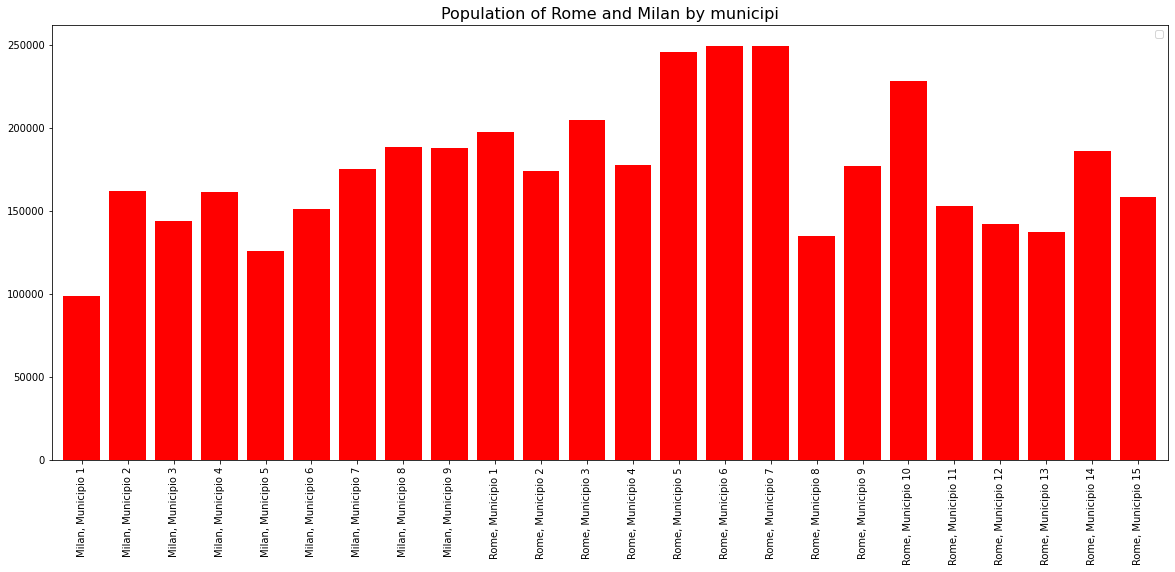

In [31]:
bars = df3['name']
y_pos = np.arange(len(bars))
pupulation_plot = df3['population'].plot(kind = "bar", figsize = (20,8), width = 0.8, color='red')
plt.title("Population of Rome and Milan by municipi", fontsize = 16)
plt.legend([])
plt.xticks(y_pos, bars)

Bar chart of the density of each municipio of Rome and Milan.

([<matplotlib.axis.XTick at 0x2866eec4f48>,
 [Text(0, 0, 'Milan, Municipio 1'),
  Text(0, 0, 'Milan, Municipio 2'),
  Text(0, 0, 'Milan, Municipio 3'),
  Text(0, 0, 'Milan, Municipio 4'),
  Text(0, 0, 'Milan, Municipio 5'),
  Text(0, 0, 'Milan, Municipio 6'),
  Text(0, 0, 'Milan, Municipio 7'),
  Text(0, 0, 'Milan, Municipio 8'),
  Text(0, 0, 'Milan, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 1'),
  Text(0, 0, 'Rome, Municipio 2'),
  Text(0, 0, 'Rome, Municipio 3'),
  Text(0, 0, 'Rome, Municipio 4'),
  Text(0, 0, 'Rome, Municipio 5'),
  Text(0, 0, 'Rome, Municipio 6'),
  Text(0, 0, 'Rome, Municipio 7'),
  Text(0, 0, 'Rome, Municipio 8'),
  Text(0, 0, 'Rome, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 10'),
  Text(0, 0, 'Rome, Municipio 11'),
  Text(0, 0, 'Rome, Municipio 12'),
  Text(0, 0, 'Rome, Municipio 13'),
  Text(0, 0, 'Rome, Municipio 14'),
  Text(0, 0, 'Rome, Municipio 15')])

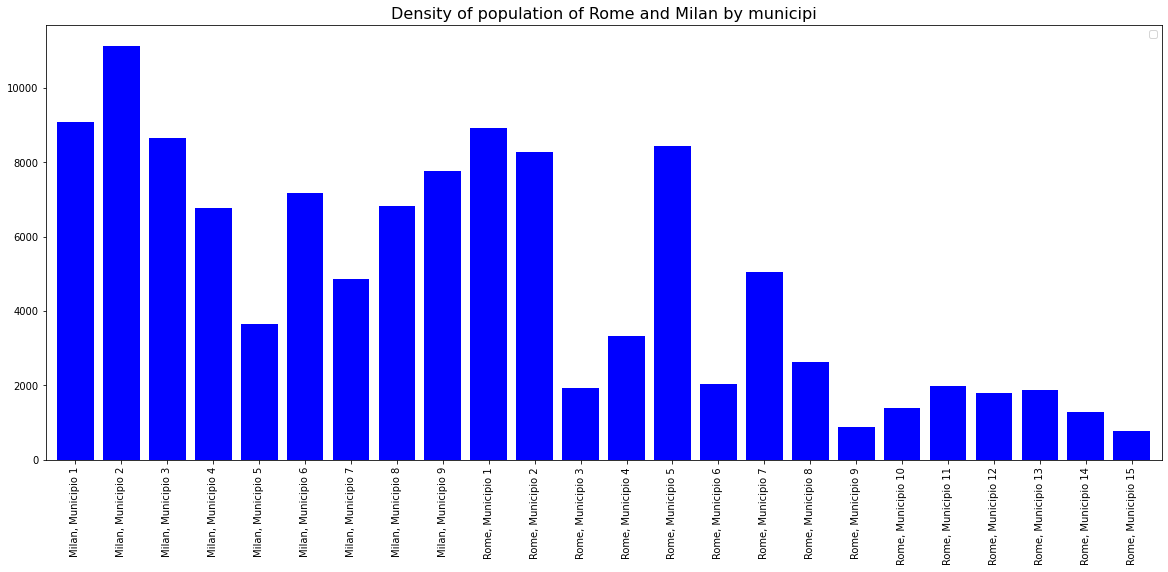

In [32]:
bars = df3['name']
y_pos = np.arange(len(bars))
density_plot = df3['density'].plot(kind = "bar", figsize = (20,8), width = 0.8, color = 'blue')
plt.title("Density of population of Rome and Milan by municipi", fontsize = 16)
plt.legend([])
plt.xticks(y_pos, bars)

Bar chart of the area of each municipio of Rome and Milan.

([<matplotlib.axis.XTick at 0x28668bbc188>,
 [Text(0, 0, 'Milan, Municipio 1'),
  Text(0, 0, 'Milan, Municipio 2'),
  Text(0, 0, 'Milan, Municipio 3'),
  Text(0, 0, 'Milan, Municipio 4'),
  Text(0, 0, 'Milan, Municipio 5'),
  Text(0, 0, 'Milan, Municipio 6'),
  Text(0, 0, 'Milan, Municipio 7'),
  Text(0, 0, 'Milan, Municipio 8'),
  Text(0, 0, 'Milan, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 1'),
  Text(0, 0, 'Rome, Municipio 2'),
  Text(0, 0, 'Rome, Municipio 3'),
  Text(0, 0, 'Rome, Municipio 4'),
  Text(0, 0, 'Rome, Municipio 5'),
  Text(0, 0, 'Rome, Municipio 6'),
  Text(0, 0, 'Rome, Municipio 7'),
  Text(0, 0, 'Rome, Municipio 8'),
  Text(0, 0, 'Rome, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 10'),
  Text(0, 0, 'Rome, Municipio 11'),
  Text(0, 0, 'Rome, Municipio 12'),
  Text(0, 0, 'Rome, Municipio 13'),
  Text(0, 0, 'Rome, Municipio 14'),
  Text(0, 0, 'Rome, Municipio 15')])

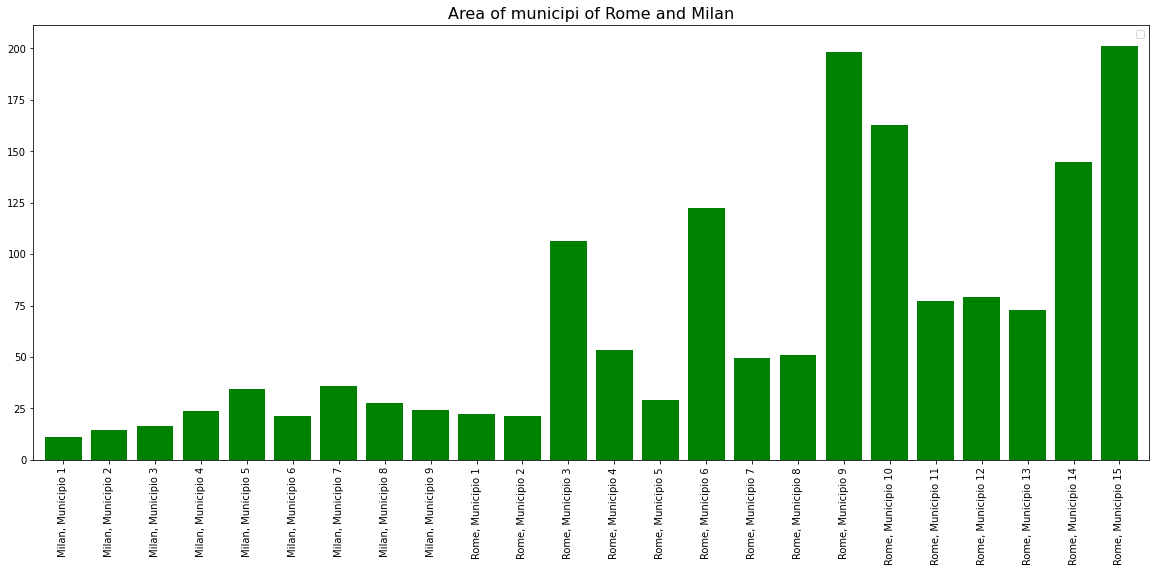

In [33]:
bars = df3['name']
y_pos = np.arange(len(bars))
pupulation_plot = df3['area'].plot(kind = "bar", figsize = (20,8), width = 0.8, color='green')
plt.title("Area of municipi of Rome and Milan", fontsize = 16)
plt.legend([])
plt.xticks(y_pos, bars)

## MAPS

### STANDARD MAPS

Get the coordinates of Rome and Milan.

In [34]:
address = 'Rome, RM'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
rome_latitude = location.latitude
rome_longitude = location.longitude
print('The geograpical coordinate of Rome are {}, {}.'.format(rome_latitude, rome_longitude))
address = 'Milan, MI'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
milan_latitude = location.latitude
milan_longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(milan_latitude, milan_longitude))

The geograpical coordinate of Rome are 41.8933203, 12.4829321.
The geograpical coordinate of Milan are 45.4668, 9.1905.


Print a map of Rome, where the circles are the representative points.

In [35]:
rome_municipi_map = folium.Map(location=[rome_latitude, rome_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df1['repr_point_latitude'], df1['repr_point_longitude'], df1['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(rome_municipi_map)  
    
rome_municipi_map

Print a map of Milan, where the circles are the representative points.

In [36]:
milan_municipi_map = folium.Map(location=[milan_latitude, milan_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df2['repr_point_latitude'], df2['repr_point_longitude'], df2['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(milan_municipi_map)  
    
milan_municipi_map

### MAPS WITH .SHP FILES

Print a map of municipi of Rome.

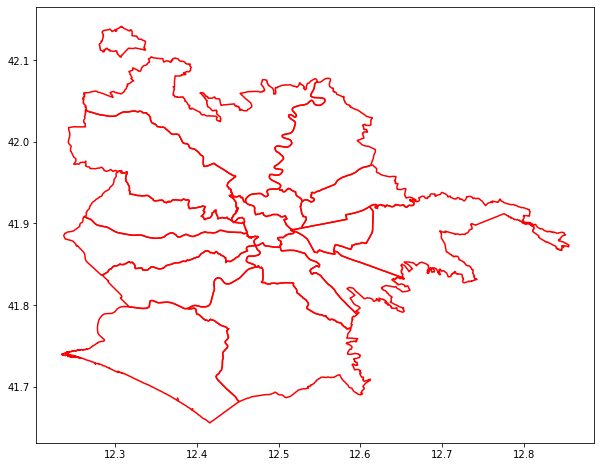

In [37]:
df1.set_geometry(col = 'shape').boundary.plot(color='red', figsize=(10, 10))

Print a map of municipi of Milan.

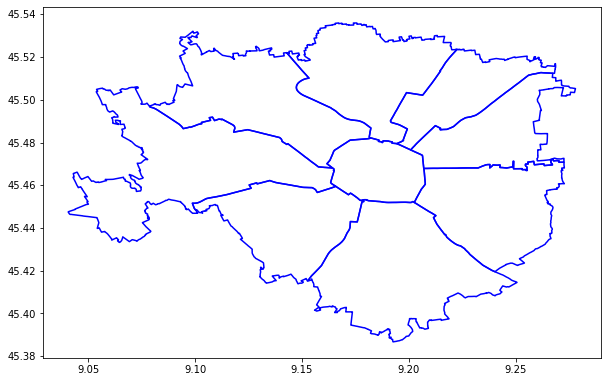

In [38]:
df2.set_geometry(col = 'shape').boundary.plot(color='blue',figsize=(10, 10))

### CHOROPLETH MAPS WITH .SHP FILES

Print choropleth maps of Rome and Milan, where the variable is the population.

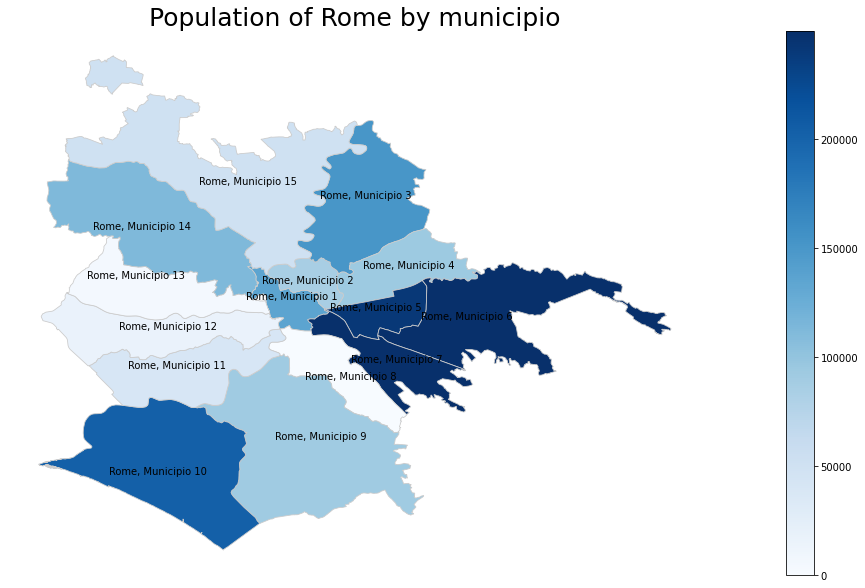

In [39]:
variable = 'population'
vmin, vmax = 0, df1['population'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Population of Rome by municipio', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)
df1.set_geometry(col = 'shape').plot(column = variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
for idx, row in df1.iterrows():
    plt.annotate(s=row['name'], xy=row['repr_point_coordinates'],horizontalalignment='center')

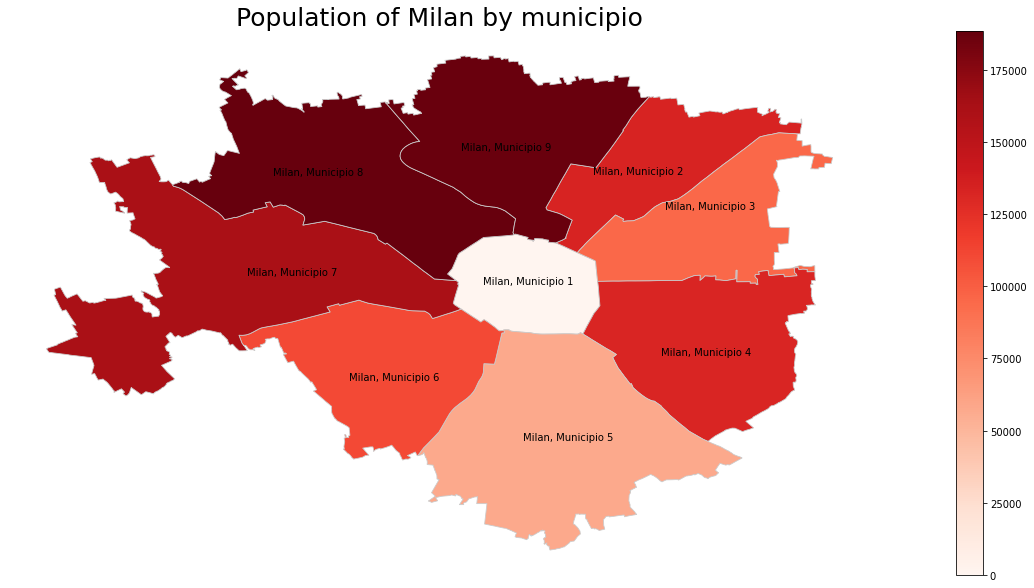

In [40]:
variable = 'population'
vmin, vmax = 0, df2['population'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Population of Milan by municipio', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)
df2.set_geometry(col = 'shape').plot(column = variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
for idx, row in df2.iterrows():
    plt.annotate(s=row['name'], xy=row['repr_point_coordinates'],horizontalalignment='center')

Print choropleth maps, where the variable is the density.

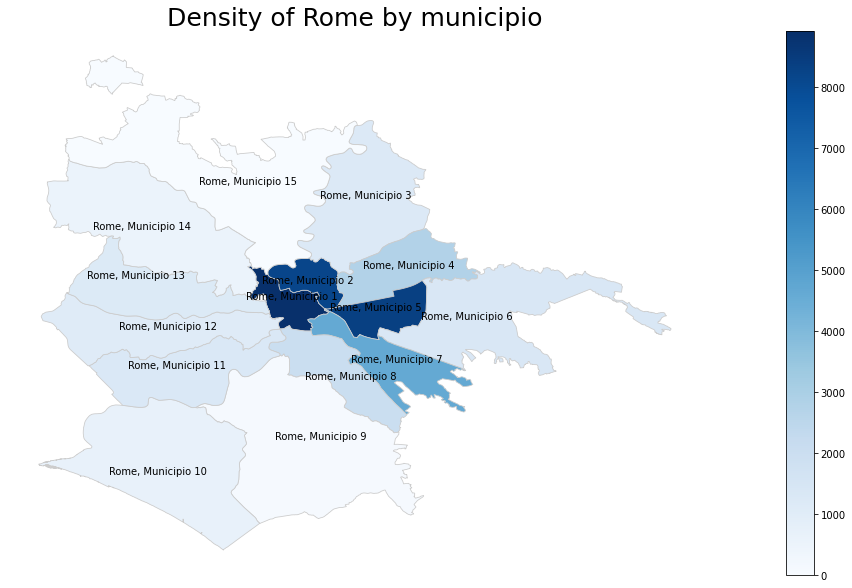

In [41]:
variable = 'density'
vmin, vmax = 0, df1['density'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Density of Rome by municipio', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)
df1.set_geometry(col = 'shape').plot(column = variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

for idx, row in df1.iterrows():
    plt.annotate(s=row['name'], xy=row['repr_point_coordinates'],horizontalalignment='center')

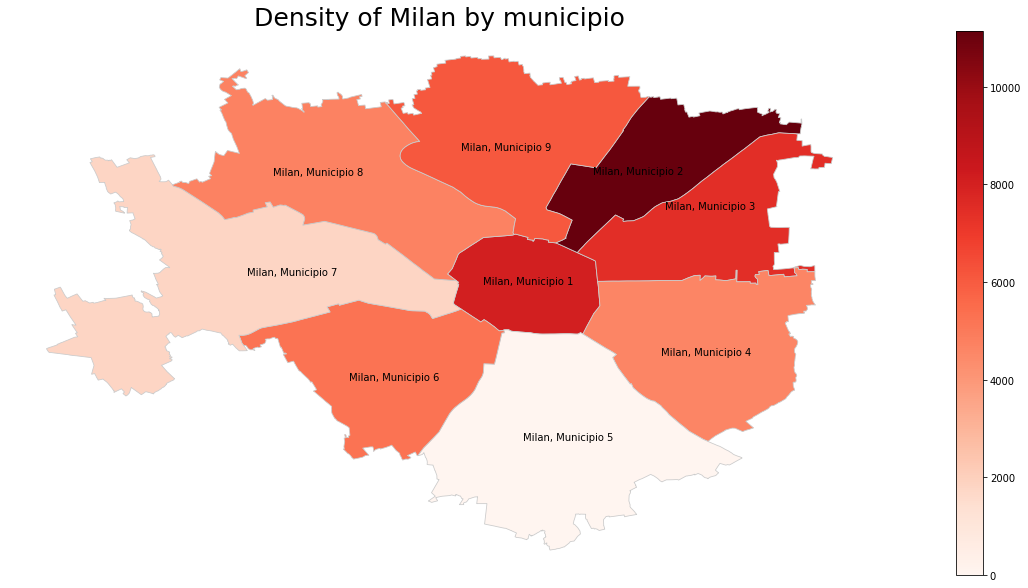

In [42]:
variable = 'density'
vmin, vmax = 0, df2['density'].max()
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Density of Milan by municipio', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)
df2.set_geometry(col = 'shape').plot(column = variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

for idx, row in df2.iterrows():
    plt.annotate(s=row['name'], xy=row['repr_point_coordinates'],horizontalalignment='center')

# FOURSQUARE

Set my Foursquare ID, my Foursquare Secret and the API version.

In [43]:
CLIENT_ID = 'WIMVXBBMBOBSEMMTJHRF1HRMZBK1IJFCGFHCLLZLZ05G2F30' # your Foursquare ID
CLIENT_SECRET = 'NQHS0P55SC3NMDQXG4CWEXGRF1VIXZUB3AV5UKX3DGDHQUQW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WIMVXBBMBOBSEMMTJHRF1HRMZBK1IJFCGFHCLLZLZ05G2F30
CLIENT_SECRET:NQHS0P55SC3NMDQXG4CWEXGRF1VIXZUB3AV5UKX3DGDHQUQW


To use Foursquare we have to choose a point for each municipio and a circle centered in this point, of a given radius.
So we have to decide which point is better (the centroid, the representative point or the municipality).
In order to do this, we print maps of Rome, with municipi's borders and centroids, representative points and municipalities.

Print maps of Rome, with municipi's borders and centroids.

(12.203396617779612, 12.886802998372715, 41.63123886222314, 42.16543881495566)

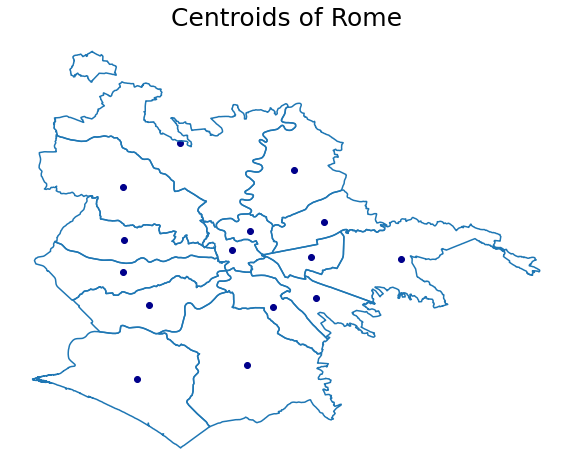

In [44]:
ax = df1.set_geometry(col = 'shape').boundary.plot(figsize=(10, 10))
df1.set_geometry(col = 'centroid').plot(ax=ax,color='darkblue')
ax.set_title('Centroids of Rome', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')

Print maps of Rome, with municipi's borders and representative points.

(12.203396617779612, 12.886802998372715, 41.63123886222314, 42.16543881495566)

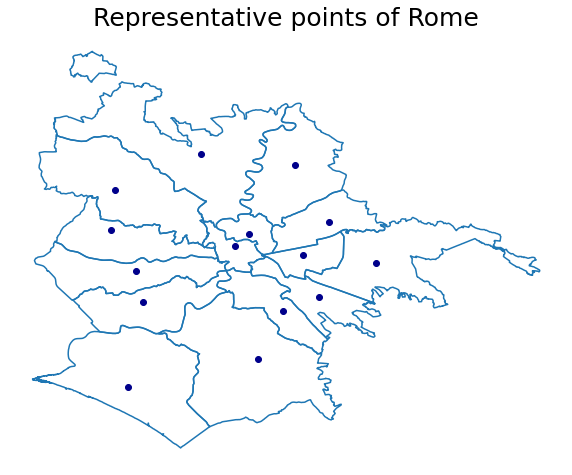

In [45]:
ax = df1.set_geometry(col = 'shape').boundary.plot(figsize=(10, 10))
df1.set_geometry(col = 'representative_point').plot(ax=ax,color='darkblue')
ax.set_title('Representative points of Rome', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')

Print maps of Rome, with municipi's borders and municipalities.

(12.203396617779612, 12.886802998372715, 41.63123886222314, 42.16543881495566)

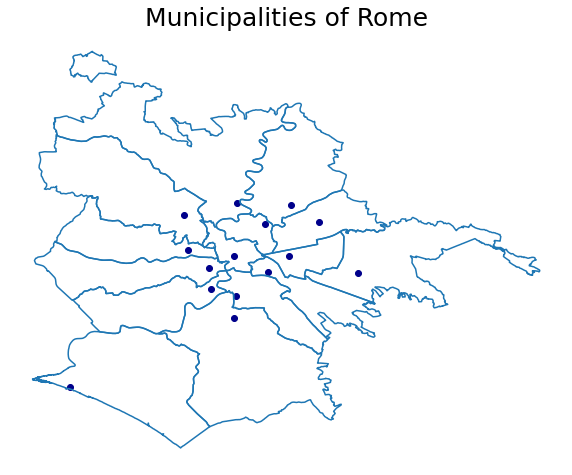

In [46]:
ax = df1.set_geometry(col = 'shape').boundary.plot(figsize=(10, 10))
df1.set_geometry(col = 'municipality').plot(ax=ax,color='darkblue')
ax.set_title('Municipalities of Rome', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')

As the previous plots show, the best choice is to pick the representative points as centers of our circles.

Now we have to caluculate the radius of each circle.
The following is a function that retrives the minimum distance between a municipio and the others municipi.

In [47]:
def get_distances(df, index):
    locations = df[['repr_point_latitude','repr_point_longitude']].values
    tmp = list(map(tuple, locations))
    distances = []
    for i in range(0,df.shape[0]):
         distances.append(geodesic(tmp[index],tmp[i]).meters)
    return int(sorted(distances)[1])

Use the function for Rome.

In [48]:
rome_dist_list = []
for n in range(0, df1.shape[0]):
    rome_dist_list.append(get_distances(df1, n))
df1['radius']=rome_dist_list
df1['radius']=df1['radius']/2

Use the function for Milan.

In [49]:
milan_dist_list = []
for n in range(0, df2.shape[0]):
    milan_dist_list.append(get_distances(df1, n))
df2['radius']=milan_dist_list 
df2['radius']=df2['radius']/2

In [50]:
df3['radius']= milan_dist_list+rome_dist_list
df3['radius']=df3['radius']/2

## EXPLORE THE MUNICIPIO 2 OF ROME (where I and my ex-girlfriend live)

We will start with my municipio.

### GET VENUES OF MUNICIPIO 2

In [51]:
m_latitude = df1.loc[1, 'repr_point_latitude'] 
m_longitude = df1.loc[1, 'repr_point_longitude'] 
m_name = df1.loc[1, 'name']
m_radius = df1.loc[1, 'radius'].astype(int)
m_limit = 300
print('We will find venues in {} in a circle centered in ({}, {}), with a radius of {} meters and with a limit of {}.'.format(m_name, 
                                                               m_latitude, 
                                                               m_longitude,
                                                               m_radius,
                                                               m_limit))

We will find venues in Rome, Municipio 2 in a circle centered in (41.9180956, 12.4989397), with a radius of 1085 meters and with a limit of 300.


A function to get the category of a venue.

In [52]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

A function to return venus from a fixed location and category.

In [53]:
def getNearbyVenues(latitude, longitude, radius, limit):
    
      # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    limit)

    # send GET request and get trending venues
    results = requests.get(url).json()
    
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON
    
    # filter columns
    nearby_venues_filtered = nearby_venues
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.address', 'venue.location.distance', 'venue.id']
    nearby_venues_filtered =nearby_venues_filtered.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues_filtered['venue.categories'] = nearby_venues_filtered.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues_filtered.columns = [col.split(".")[-1] for col in nearby_venues_filtered.columns]
    nearby_venues_filtered = nearby_venues_filtered[['id', 'name', 'lat', 'lng', 'distance', 'categories', 'address']]
    
    return(nearby_venues_filtered)
    

Serch for venues in municipio 2 of Rome.

In [54]:
m_venues = getNearbyVenues(m_latitude, m_longitude, m_radius, m_limit)
m_venues.head()

,id,name,lat,lng,distance,categories,address
0,4fad7a5ae4b01d34f6c204a1,Kilo Restaurant,41.918245,12.498625,30,Steakhouse,"Via Tirso, 30"
1,4c8f3e8d960a9c747398157d,Bucavino,41.917442,12.499237,76,Italian Restaurant,"Via Po, 45/A"
2,54cbf4c4498ee7851cfad7df,Ristorante Lin,41.916750,12.499490,156,Chinese Restaurant,"Via Basento, 70/76"
3,4de94108ae6029331905bf34,Hostaria l'isola d'oro,41.917649,12.497038,165,Italian Restaurant,Via salaria 180
4,551ac4f1498efe6dae0f52a4,Mamma Mia,41.918150,12.496798,177,Italian Restaurant,Via Giovanni Pacini 31


See how many venues were returned by Foursquare.

In [55]:
print('{} venues were returned by Foursquare.'.format(m_venues.shape[0]))

50 venues were returned by Foursquare.


Eliminate duplicates.

In [56]:
a= m_venues.drop_duplicates('id', keep='first')

See all the distinct categories retrieved.

In [57]:
m_venues.groupby('categories').count()

,id,name,lat,lng,distance,address
categories,,,,,,
Art Museum,3,3,3,3,3,3
Beer Store,1,1,1,1,1,1
Café,3,3,3,3,3,3
Chinese Restaurant,2,2,2,2,2,2
Coffee Shop,1,1,1,1,1,1
Cupcake Shop,1,1,1,1,1,1
Dessert Shop,1,1,1,1,1,1
Diner,1,1,1,1,1,1
Dog Run,1,1,1,1,1,1


Print a map of all the venues.

In [58]:
m_venues_map = folium.Map(location=[m_latitude, m_longitude], zoom_start=15)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(m_venues.lat, m_venues.lng, m_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m_venues_map)

# display map
m_venues_map

# FIND VENUES OF EACH MUNICIPIO IN ROME AND MILAN

Now we will extend our analysis to all municipi.

A function to get nearby venues of each municipio of cities.

In [59]:
def getAllNearbyVenues(numbers, names, latitudes, longitudes, cities, radia, limit):
    
    
    venues_list=[]
    for number, name, lat, lng, city, radius in zip(numbers, names, latitudes, longitudes, cities, radia):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            city,
            number,
            name, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']) for v in results]) 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city',
                             'municipio_number',
                  'municipio_name',
                  'name',
                  'id',
                  'lat', 
                  'lng',
                  'distance',
                  'categories']
    
    return(nearby_venues)

Use the function.

In [60]:
rm_venues = getAllNearbyVenues(numbers=df3['number'],
                                   names=df3['name'],
                                   latitudes=df3['repr_point_latitude'],
                                   longitudes=df3['repr_point_longitude'],
                                   cities=df3['city'],
                                   radia=df3['radius'],
                                   limit=300
                                  )
rm_venues = rm_venues.drop_duplicates('id', keep='first').reset_index(drop=True)
print('{} venues were returned by Foursquare, divided into {} uniques categories.'.format(rm_venues.shape[0], len(rm_venues['categories'].unique())))

Milan, Municipio 1
Milan, Municipio 2
Milan, Municipio 3
Milan, Municipio 4
Milan, Municipio 5
Milan, Municipio 6
Milan, Municipio 7
Milan, Municipio 8
Milan, Municipio 9
Rome, Municipio 1
Rome, Municipio 2
Rome, Municipio 3
Rome, Municipio 4
Rome, Municipio 5
Rome, Municipio 6
Rome, Municipio 7
Rome, Municipio 8
Rome, Municipio 9
Rome, Municipio 10
Rome, Municipio 11
Rome, Municipio 12
Rome, Municipio 13
Rome, Municipio 14
Rome, Municipio 15
1441 venues were returned by Foursquare, divided into 225 uniques categories.


Add to the dataframe informaton about the number of venues.

In [61]:
df3['venues']=rm_venues.groupby(['city', 'municipio_number']).count()['name'].tolist()

A bar chart of the number of venues retrieved for each municipio.

([<matplotlib.axis.XTick at 0x28670e874c8>,
 [Text(0, 0, 'Milan, Municipio 1'),
  Text(0, 0, 'Milan, Municipio 2'),
  Text(0, 0, 'Milan, Municipio 3'),
  Text(0, 0, 'Milan, Municipio 4'),
  Text(0, 0, 'Milan, Municipio 5'),
  Text(0, 0, 'Milan, Municipio 6'),
  Text(0, 0, 'Milan, Municipio 7'),
  Text(0, 0, 'Milan, Municipio 8'),
  Text(0, 0, 'Milan, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 1'),
  Text(0, 0, 'Rome, Municipio 2'),
  Text(0, 0, 'Rome, Municipio 3'),
  Text(0, 0, 'Rome, Municipio 4'),
  Text(0, 0, 'Rome, Municipio 5'),
  Text(0, 0, 'Rome, Municipio 6'),
  Text(0, 0, 'Rome, Municipio 7'),
  Text(0, 0, 'Rome, Municipio 8'),
  Text(0, 0, 'Rome, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 10'),
  Text(0, 0, 'Rome, Municipio 11'),
  Text(0, 0, 'Rome, Municipio 12'),
  Text(0, 0, 'Rome, Municipio 13'),
  Text(0, 0, 'Rome, Municipio 14'),
  Text(0, 0, 'Rome, Municipio 15')])

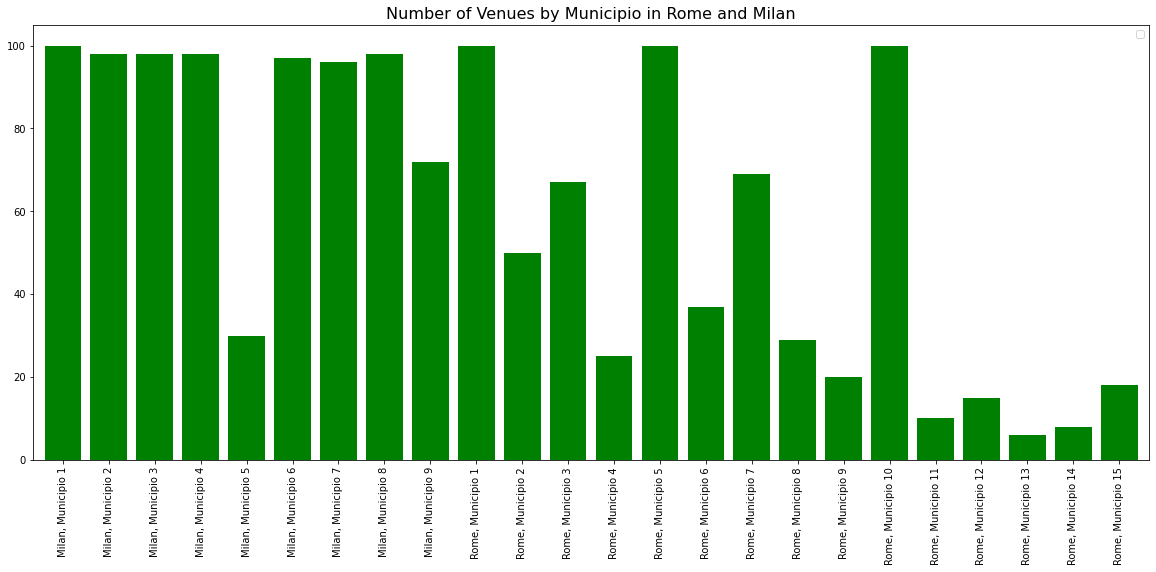

In [62]:
bars = df3['venues']
y_pos = np.arange(len(bars))
rm_venues_plot = df3['venues'].plot(kind = "bar", figsize = (20,8), width = 0.8, color='green')
plt.title("Number of Venues by Municipio in Rome and Milan", fontsize = 16)
plt.legend([])
plt.xticks(np.arange(len(bars)),df3['name'])

Calculate the density of venues retrieved for each municipio.

In [63]:
df3['venues_density'] = df3['venues'] / (3.14 * df3['radius'] * df3['radius'])

# ANALIZE VENUES IN EACH MUNICIPIO

A function that retrives a new dataframe with the top 10 venues for each municipio in Rome and Milan.
This is a variation of the code of the previous labs.

In [64]:
def getTopTenVenues(numbers, names, latitudes, longitudes, cities, radia, categories):
    venues_onehot = pd.get_dummies(categories, prefix="", prefix_sep="")
    venues_onehot['municipio_name'] = names 
    venues_onehot['municipio_number'] = numbers 
    venues_onehot['city'] = cities
    cols = list(venues_onehot.columns)
    cols = [cols[-1]] + [cols[-2]]+ [cols[-3]] + cols[:-3]
    venues_onehot = venues_onehot[cols]
    venues_grouped = venues_onehot.groupby(['city','municipio_name']).mean().reset_index()
    venues_grouped = venues_grouped.sort_values(by=['city', 'municipio_number'], ascending=True)
    num_top_venues = 10

    for hood in venues_grouped['municipio_name']:
        print(hood)
        temp = venues_grouped[venues_grouped['municipio_name'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[3:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

    def return_most_common_venues(row, num_top_venues):
        row_categories = row
        row_categories_sorted = row_categories.sort_values(ascending=False)
        return row_categories_sorted.index.values[0:num_top_venues]
    
    indicators = ['st', 'nd', 'rd']
    columns = ['municipio_number','city']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
        
    venues_sorted = pd.DataFrame(columns=columns)
    venues_sorted['municipio_name'] = venues_grouped['municipio_name']
    venues_sorted['municipio_number'] = venues_grouped['municipio_number']
    venues_sorted['city'] = venues_grouped['city']
    for ind in np.arange(venues_grouped.shape[0]):
        venues_sorted.iloc[ind, 2:-1] = return_most_common_venues(venues_grouped.iloc[ind, :].iloc[3:], num_top_venues)
    
    return(venues_grouped, venues_sorted)

Use the function.

In [65]:
rm_venues_grouped, rm_venues_top_ten= getTopTenVenues(numbers=rm_venues['municipio_number'],
                                   names=rm_venues['municipio_name'],
                                   latitudes=rm_venues['lat'],
                                   longitudes=rm_venues['lng'],
                                   cities=rm_venues['city'],
                                   radia=df3['radius'],
                                   categories = rm_venues['categories']
                                  )

Milan, Municipio 1
                 venue  freq
0                Plaza  0.11
1   Italian Restaurant  0.09
2       Ice Cream Shop  0.08
3                Hotel  0.07
4         Cocktail Bar  0.05
5          Pizza Place  0.05
6  Monument / Landmark  0.04
7           Art Museum  0.04
8               Bakery  0.04
9                 Café  0.02


Milan, Municipio 2
                venue  freq
0  Italian Restaurant  0.13
1         Pizza Place  0.08
2               Hotel  0.05
3        Cocktail Bar  0.05
4          Restaurant  0.04
5      Ice Cream Shop  0.04
6  Chinese Restaurant  0.03
7  Seafood Restaurant  0.02
8               Plaza  0.02
9   Convenience Store  0.02


Milan, Municipio 3
                venue  freq
0  Italian Restaurant  0.15
1         Pizza Place  0.07
2                Café  0.05
3      Ice Cream Shop  0.05
4        Cocktail Bar  0.05
5               Hotel  0.03
6         Art Gallery  0.03
7              Bistro  0.03
8             Brewery  0.02
9            Boutique  0.02


Mi

See the output.

In [66]:
rm_venues_grouped.head()

,city,municipio_name,municipio_number,Abruzzo Restaurant,Accessories Store,Adult Education Center,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bakery,Ballroom,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boarding House,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Camera Store,Campanian Restaurant,Campground,Canal,Castle,Cave,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Farm,Fast Food Restaurant,Film Studio,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Library,Light Rail Station,Lombard Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Nature Preserve,Nightclub,Nightlife Spot,Noodle House,Office,Opera House,Other Nightlife,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Piadineria,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Puglia Restaurant,Racecourse,Ramen Restaurant,Record Shop,Recording Studio,Rest Area,Restaurant,Road,Rock Club,Roman Restaurant,Russian Restaurant,Salon / Barbershop,Sandwich Place,Sardinian Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Zoo
0,milan,"Milan, Municipio 1",1,0.000000,0.01,0.0,0.0,0.000000,0.0,0.000000,0.020000,0.040000,0.000000,0.0,0.0,0.0,0.040000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,0.01,0.000000,0.0,0.000000,0.000000,0.020000,0.010000,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.000000,0.01,0.050000,0.020000,0.01,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.01,0.0,0.01,0.0,0.010000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.01,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.01,0.0,0.01,0.000000,0.0,0.0,0.000000,0.000000,0.020000,0.0,0.02,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.070000,0.0,0.0,0.080000,0.000000,0.0,0.090000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.010000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.040000,0.000000,0

In [67]:
rm_venues_top_ten.head()

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
0,1,milan,Plaza,Italian Restaurant,Ice Cream Shop,Hotel,Cocktail Bar,Pizza Place,Art Museum,Bakery,Monument / Landmark,Art Gallery,"Milan, Municipio 1"
1,2,milan,Italian Restaurant,Pizza Place,Hotel,Cocktail Bar,Ice Cream Shop,Restaurant,Chinese Restaurant,Movie Theater,Plaza,Park,"Milan, Municipio 2"
2,3,milan,Italian Restaurant,Pizza Place,Cocktail Bar,Ice Cream Shop,Café,Hotel,Bistro,Art Gallery,Japanese Restaurant,Boutique,"Milan, Municipio 3"
3,4,milan,Italian Restaurant,Pizza Place,Bakery,Café,Gym,Japanese Restaurant,Ice Cream Shop,Hotel,Sushi Restaurant,Garden,"Milan, Municipio 4"
4,5,milan,Italian Restaurant,Supermarket,Tram Station,Soccer Field,Park,Restaurant,Stables,Russian Restaurant,Farm,Lombard Restaurant,"Milan, Municipio 5"


# CLUSTERING MUNICIPI BY VENUES

Choose the best number of clusters with the elbow method point.

In [68]:
rm_venues_clustering = rm_venues_grouped.drop(['municipio_number', 'municipio_name', 'city'], axis = 1) 
inertias = []
for k in range (1, 11):
    kclusters = k
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rm_venues_clustering)
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans.labels_
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans.inertia_
    inertias.append(inertia)
inertias

[0.971682735060428,
 0.7753415053590882,
 0.6961879384389266,
 0.6219035707277427,
 0.5336898853248159,
 0.47011753934162087,
 0.41439442515807756,
 0.3694396296505187,
 0.33199226585261354,
 0.2748970250977345]

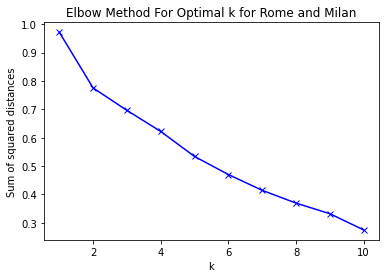

In [69]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k for Rome and Milan')
plt.show()

Run KMeans with K=5.

In [70]:
rm_kclusters = 5
rm_venues_kmeans = KMeans(n_clusters=rm_kclusters, random_state=0).fit(rm_venues_clustering)
rm_venues_clusters = rm_venues_kmeans.labels_
rm_venues_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 1,
       2, 3])

In [71]:
rm_venues_clusters_rome= rm_venues_clusters[9:]
rm_venues_clusters_milan= rm_venues_clusters[:9]

Add the cluster to the dataframe

In [72]:
rm_venues_top_ten.insert(0, 'cluster', rm_venues_clusters)
df1['cluster']= rm_venues_clusters_rome
df2['cluster']= rm_venues_clusters_milan
df3['cluster']= rm_venues_clusters

Print maps to visualize.

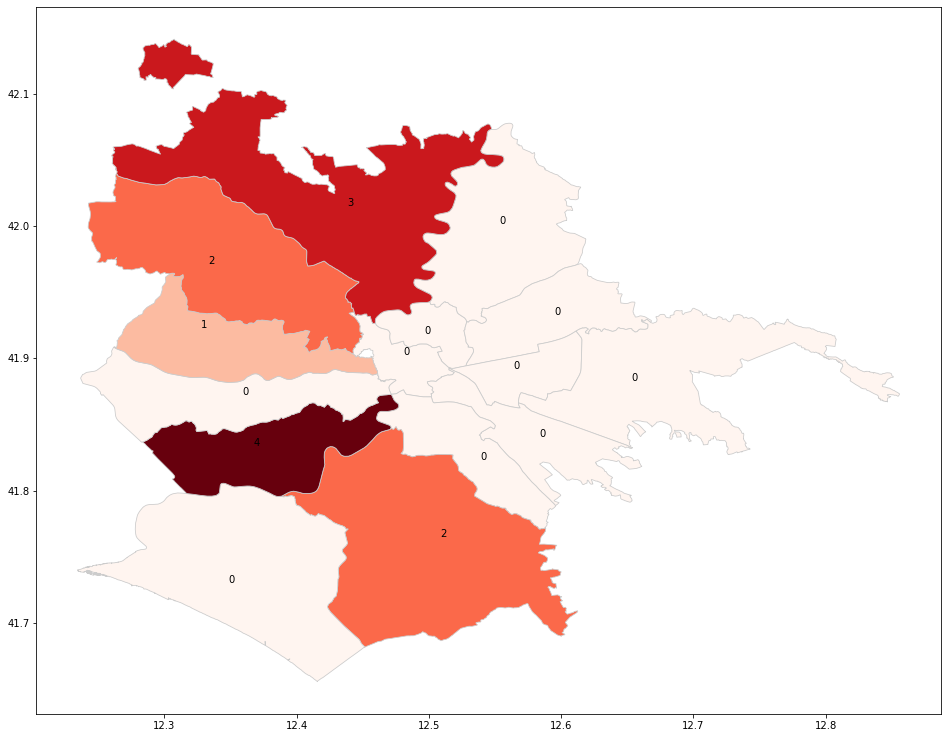

In [73]:
variable = 'cluster'
df1.set_geometry(col='shape').plot(column = variable, cmap='Reds', linewidth=0.8, edgecolor='0.8', figsize=(40, 13))

for idx, row in df1.set_geometry(col='shape').iterrows():
    plt.annotate(s=row['cluster'], xy=row['repr_point_coordinates'],horizontalalignment='center')

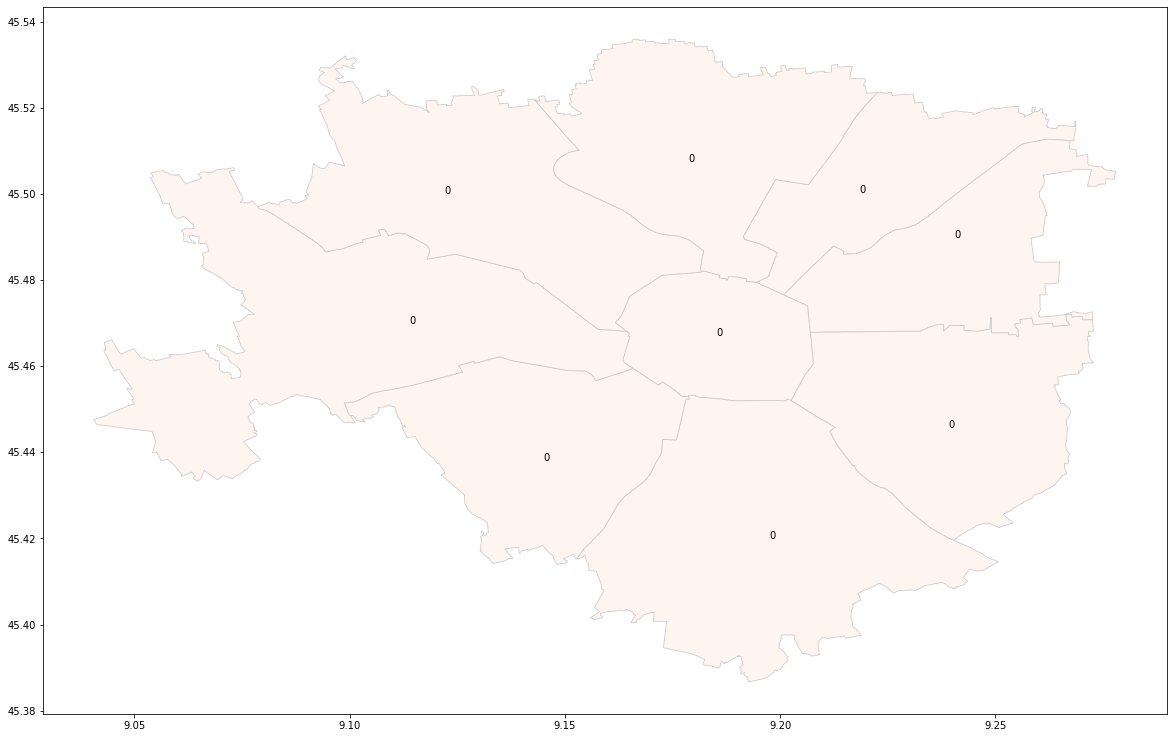

In [74]:
variable = 'cluster'
df2.set_geometry(col='shape').plot(column = variable, cmap='Reds', linewidth=0.8, edgecolor='0.8', figsize=(40, 13))

for idx, row in df2.set_geometry(col='shape').iterrows():
    plt.annotate(s=row['cluster'], xy=row['repr_point_coordinates'],horizontalalignment='center')

In [75]:
rome_clusters_map2 = folium.Map(location=[rome_latitude, rome_longitude], zoom_start=10)
rm_clusters_colors=get_colors(rm_kclusters)
for lat, lon, poi, cluster in zip(df1['repr_point_latitude'], df1['repr_point_longitude'], df1['name'], df1['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rm_clusters_colors[cluster],
        fill=True,
        fill_color=rm_clusters_colors[cluster],
        fill_opacity=0.7).add_to(rome_clusters_map2)
       
rome_clusters_map2

In [76]:
milan_clusters_map2 = folium.Map(location=[milan_latitude, milan_longitude], zoom_start=12)
for lat, lon, poi, cluster in zip(df2['repr_point_latitude'], df2['repr_point_longitude'], df2['name'], df2['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rm_clusters_colors[cluster],
        fill=True,
        fill_color=rm_clusters_colors[cluster],
        fill_opacity=0.7).add_to(milan_clusters_map2)
       
milan_clusters_map2

Examine clusters.

In [77]:
rm_venues_top_ten.loc[rm_venues_top_ten['cluster'] == 0, rm_venues_top_ten.columns[[1,2] + list(range(3, rm_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
0,1,milan,Plaza,Italian Restaurant,Ice Cream Shop,Hotel,Cocktail Bar,Pizza Place,Art Museum,Bakery,Monument / Landmark,Art Gallery,"Milan, Municipio 1"
1,2,milan,Italian Restaurant,Pizza Place,Hotel,Cocktail Bar,Ice Cream Shop,Restaurant,Chinese Restaurant,Movie Theater,Plaza,Park,"Milan, Municipio 2"
2,3,milan,Italian Restaurant,Pizza Place,Cocktail Bar,Ice Cream Shop,Café,Hotel,Bistro,Art Gallery,Japanese Restaurant,Boutique,"Milan, Municipio 3"
3,4,milan,Italian Restaurant,Pizza Place,Bakery,Café,Gym,Japanese Restaurant,Ice Cream Shop,Hotel,Sushi Restaurant,Garden,"Milan, Municipio 4"
4,5,milan,Italian Restaurant,Supermarket,Tram Station,Soccer Field,Park,Restaurant,Stables,Russian Restaurant,Farm,Lombard Restaurant,"Milan, Municipio 5"
5,6,milan,Italian Restaurant,Cocktail Bar,Seafood Restaurant,Hotel,Café,Japanese Restaurant,Ice Cream Shop,Bookstore,Art Gallery,Boutique,"Milan, Municipio 6"
6,7,milan,Pizza Place,Supermarket,Café,Italian Restaurant,Bar,Sporting Goods Shop,Seafood Restaurant,Restaurant,Soccer Stadium,Chinese Restaurant,"Milan, Municipio 7"
7,8,milan,Italian Restaurant,Hotel,Tram Station,Supermarket,Pizza Place,Café,Bakery,Restaurant,Fast Food Restaurant,Park,"Milan, Municipio 8"
8,9,milan,Italian Restaurant,Pizza Place,Ice Cream Shop,Seafood Restaurant,Japanese Restaurant,Bistro,Gym / Fitness Center,Steakhouse,Supermarket,Café,"Milan, Municipio 9"
9,1,rome,Italian Restaurant,Hotel,Ice Cream Shop,Plaza,Boutique,Sandwich Place,Monument / Landmark,Toy / Game Store,Café,Historic Site,"Rome, Municipio 1"


In [78]:
rm_venues_top_ten.loc[rm_venues_top_ten['cluster'] == 1, rm_venues_top_ten.columns[[1,2] + list(range(3, rm_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
13,13,rome,Construction & Landscaping,Accessories Store,Italian Restaurant,Gym / Fitness Center,Department Store,Zoo,Electronics Store,Dog Run,Donut Shop,Eastern European Restaurant,"Rome, Municipio 13"


In [79]:
rm_venues_top_ten.loc[rm_venues_top_ten['cluster'] == 2, rm_venues_top_ten.columns[[1,2] + list(range(3, rm_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
23,9,rome,Hotel,Pizza Place,Italian Restaurant,Café,Soccer Field,Stadium,Farm,Gym / Fitness Center,Fast Food Restaurant,Food & Drink Shop,"Rome, Municipio 9"
14,14,rome,Hotel,Italian Restaurant,Pizza Place,Restaurant,Cave,Palace,Discount Store,Film Studio,Fast Food Restaurant,Farm,"Rome, Municipio 14"


In [80]:
rm_venues_top_ten.loc[rm_venues_top_ten['cluster'] == 3, rm_venues_top_ten.columns[[1,2] + list(range(3, rm_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
15,15,rome,Café,Gym / Fitness Center,Chinese Restaurant,Pub,Asian Restaurant,Light Rail Station,Restaurant,Seafood Restaurant,Smoke Shop,Supermarket,"Rome, Municipio 15"


In [81]:
rm_venues_top_ten.loc[rm_venues_top_ten['cluster'] == 4, rm_venues_top_ten.columns[[1,2] + list(range(3, rm_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
11,11,rome,Hotel,Italian Restaurant,Spa,Gym / Fitness Center,Electronics Store,Restaurant,Furniture / Home Store,Event Space,Hotel Bar,Light Rail Station,"Rome, Municipio 11"


# GET VENUES BY FIXED CATEGORY IN MUNICIPIO 2 ROME

Function to return venus from a fixed location and category.

In [82]:
def getNearbyVenuesByCategory(latitude, longitude, category_id, radius, limit):
    
    # define URL
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    latitude,
    longitude,
    category_id,
    radius,
    limit)

    # send GET request and get trending venues
    results = requests.get(url).json()
    
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    category_venues = json_normalize(venues)
    
    
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in category_venues.columns if col.startswith('location.')] + ['id']
    category_venues_filtered = category_venues.loc[:, filtered_columns]


    # filter the category for each row
    category_venues_filtered['categories'] = category_venues_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    category_venues_filtered.columns = [column.split('.')[-1] for column in category_venues_filtered.columns]

    category_venues_filtered = category_venues_filtered[['id', 'name', 'lat', 'lng', 'distance', 'categories', 'address']]
    
   
    return(category_venues_filtered)

Example with category 'Food' in my municipio.

In [83]:
food_id = '4d4b7105d754a06374d81259' # FOOD
bar_id = '4d4b7105d754a06376d81259' # BAR
m_food_venues = getNearbyVenuesByCategory(m_latitude, m_longitude, food_id, m_radius, m_limit)
m_food_venues.head()

,id,name,lat,lng,distance,categories,address
0,4fad7a5ae4b01d34f6c204a1,Kilo Restaurant,41.918245,12.498625,30,Steakhouse,"Via Tirso, 30"
1,4bf277d455c7c9b68a1a6204,Sesto,41.918005,12.500351,117,Breakfast Spot,"Piazza Buenos Aires, 3"
2,551ac4f1498efe6dae0f52a4,Mamma Mia,41.918150,12.496798,177,Italian Restaurant,Via Giovanni Pacini 31
3,4f7ed654e4b0c2f763e333f4,Pinsere,41.907615,12.497823,1170,Pizza Place,"Via Flavia, 98"
4,5d2a476ce0332c0023b2875a,Le Mille E Una Notte - The Thousand And One Night,41.909730,12.491145,1133,Lebanese Restaurant,NaN


Map of venues in category 'Bar' in Municipio II.

In [84]:
m_food_map = folium.Map(location=[m_latitude, m_longitude], zoom_start=15) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(m_food_venues.lat, m_food_venues.lng, m_food_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(m_food_map)

# display map
m_food_map

# FIND VENUES IN A FIXED CATEGORY OF ALL MUNICIPI

## FOOD

A function to get nearby venues of a fixed category of each municipio.

In [85]:
def getAllNearbyVenuesByCategory(numbers, names, category, latitudes, longitudes, cities, radia, limit):


    venues_list=[]
    for number, name, lat, lng, city, radius in zip(numbers, names, latitudes, longitudes, cities, radia):
        print(name)
        # define URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            category,
            radius,
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            city,
            number,
            name, 
            v['name'],
            v['id'],
            v['location']['lat'],
            v['location']['lng'],
            v['location']['distance'],
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city',
                             'municipio_number',
                  'municipio_name',
                  'name',
                  'id',
                  'lat', 
                  'lng',
                  'distance',
                  'categories']
    
    return(nearby_venues)

Use the function for Rome and Milan together.

In [86]:
rm_food_venues = getAllNearbyVenuesByCategory(numbers = df3['number'],
                                               names = df3['name'],
                                               category = food_id,
                                               latitudes = df3['repr_point_latitude'],
                                               longitudes = df3['repr_point_longitude'],
                                               cities = df3['city'],
                                               radia = df3['radius'],
                                               limit = 300)
rm_food_venues = rm_food_venues.drop_duplicates('id', keep='first').reset_index(drop=True)
print('{} venues were returned by Foursquare, divided into {} uniques categories.'.format(rm_food_venues.shape[0], len(rm_food_venues['categories'].unique())))

Milan, Municipio 1
Milan, Municipio 2
Milan, Municipio 3
Milan, Municipio 4
Milan, Municipio 5
Milan, Municipio 6
Milan, Municipio 7
Milan, Municipio 8
Milan, Municipio 9
Rome, Municipio 1
Rome, Municipio 2
Rome, Municipio 3
Rome, Municipio 4
Rome, Municipio 5
Rome, Municipio 6
Rome, Municipio 7
Rome, Municipio 8
Rome, Municipio 9
Rome, Municipio 10
Rome, Municipio 11
Rome, Municipio 12
Rome, Municipio 13
Rome, Municipio 14
Rome, Municipio 15
997 venues were returned by Foursquare, divided into 97 uniques categories.


See the output of the function.

In [87]:
rm_food_venues.head()

,city,municipio_number,municipio_name,name,id,lat,lng,distance,categories
0,milan,1,"Milan, Municipio 1",Starbucks Reserve Roastery,58b5d3364e31c52f888a0bed,45.464920,9.186153,242,Coffee Shop
1,milan,1,"Milan, Municipio 1",McDonald's,5c77dba5c97f28002c964046,45.467644,9.183149,228,Fast Food Restaurant
2,milan,1,"Milan, Municipio 1",Granaio Caffé e Cucina,5554a367498e1a58f941e5c4,45.465692,9.188366,243,Italian Restaurant
3,milan,1,"Milan, Municipio 1",Spontini,52fb6e6411d2685ca74f57f0,45.465655,9.191222,440,Pizza Place
4,milan,1,"Milan, Municipio 1",Starbucks,5d1e3cb4b990ec0023852180,45.458397,9.191825,1070,Coffee Shop


Add to the dataframe informaton about the number of venues.

In [88]:
df3['food_venues']=rm_food_venues.groupby(['city', 'municipio_number']).count()['name'].tolist()

A bar chart of the number of food venues retrieved.

([<matplotlib.axis.XTick at 0x2866f203048>,
 [Text(0, 0, 'Milan, Municipio 1'),
  Text(0, 0, 'Milan, Municipio 2'),
  Text(0, 0, 'Milan, Municipio 3'),
  Text(0, 0, 'Milan, Municipio 4'),
  Text(0, 0, 'Milan, Municipio 5'),
  Text(0, 0, 'Milan, Municipio 6'),
  Text(0, 0, 'Milan, Municipio 7'),
  Text(0, 0, 'Milan, Municipio 8'),
  Text(0, 0, 'Milan, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 1'),
  Text(0, 0, 'Rome, Municipio 2'),
  Text(0, 0, 'Rome, Municipio 3'),
  Text(0, 0, 'Rome, Municipio 4'),
  Text(0, 0, 'Rome, Municipio 5'),
  Text(0, 0, 'Rome, Municipio 6'),
  Text(0, 0, 'Rome, Municipio 7'),
  Text(0, 0, 'Rome, Municipio 8'),
  Text(0, 0, 'Rome, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 10'),
  Text(0, 0, 'Rome, Municipio 11'),
  Text(0, 0, 'Rome, Municipio 12'),
  Text(0, 0, 'Rome, Municipio 13'),
  Text(0, 0, 'Rome, Municipio 14'),
  Text(0, 0, 'Rome, Municipio 15')])

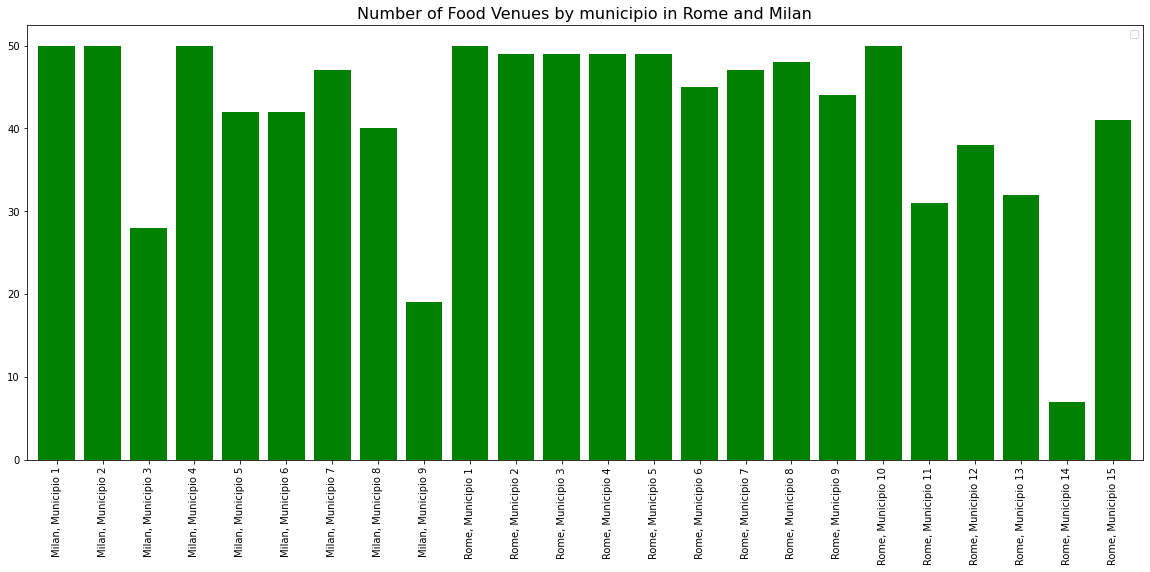

In [89]:
bars = df3['food_venues']
y_pos = np.arange(len(bars))
rm_venues_plot = df3['food_venues'].plot(kind = "bar", figsize = (20,8), width = 0.8, color='green')
plt.title("Number of Food Venues by municipio in Rome and Milan", fontsize = 16)
plt.legend([])
plt.xticks(np.arange(len(bars)),df3['name'])

Calculate the density of food venues in each municipio.

In [90]:
df3['food_venues_density'] = df3['food_venues'] / (3.14 * df3['radius'] * df3['radius'])

Divide the municipi into four quartiles, according to the density of food venues.

In [91]:
df3['food_venues_cut'] = pd.qcut(df3['food_venues_density'],4,['1st_quartile','2nd_quartile','3rd_quartile','4th_quartile'])

## BAR

Use the function for Rome and Milan together.

In [92]:
rm_bar_venues = getAllNearbyVenuesByCategory(numbers = df3['number'],
                                               names = df3['name'],
                                               category = bar_id,
                                               latitudes = df3['repr_point_latitude'],
                                               longitudes = df3['repr_point_longitude'],
                                               cities = df3['city'],
                                               radia = df3['radius'],
                                               limit = 300)
rm_bar_venues = rm_bar_venues.drop_duplicates('id', keep='first').reset_index(drop=True)
print('{} venues were returned by Foursquare, divided into {} uniques categories.'.format(rm_bar_venues.shape[0], len(rm_bar_venues['categories'].unique())))

Milan, Municipio 1
Milan, Municipio 2
Milan, Municipio 3
Milan, Municipio 4
Milan, Municipio 5
Milan, Municipio 6
Milan, Municipio 7
Milan, Municipio 8
Milan, Municipio 9
Rome, Municipio 1
Rome, Municipio 2
Rome, Municipio 3
Rome, Municipio 4
Rome, Municipio 5
Rome, Municipio 6
Rome, Municipio 7
Rome, Municipio 8
Rome, Municipio 9
Rome, Municipio 10
Rome, Municipio 11
Rome, Municipio 12
Rome, Municipio 13
Rome, Municipio 14
Rome, Municipio 15
727 venues were returned by Foursquare, divided into 62 uniques categories.


See the output of the function.

In [93]:
rm_bar_venues.head()

,city,municipio_number,municipio_name,name,id,lat,lng,distance,categories
0,milan,1,"Milan, Municipio 1",Signorvino,560d1a69498eb2f06928b885,45.467153,9.183460,196,Wine Bar
1,milan,1,"Milan, Municipio 1",Camparino,4b058878f964a520b2c722e3,45.464851,9.190036,403,Cocktail Bar
2,milan,1,"Milan, Municipio 1",laEsse,5e4828e29ed479000803de0d,45.459539,9.188207,858,Grocery Store
3,milan,1,"Milan, Municipio 1",Tutti Fritti,5435a605498e307622e50c75,45.458614,9.181254,1013,Fried Chicken Joint
4,milan,1,"Milan, Municipio 1",Puccia's Brothers,58559a898f0be459e4b83e24,45.467692,9.172805,1029,Coffee Shop


Add to the dataframe informaton about the number of venues.

In [94]:
df3['bar_venues']=rm_bar_venues.groupby(['city', 'municipio_number']).count()['name'].tolist()

A bar chart of the number of bar venues retrieved.

([<matplotlib.axis.XTick at 0x2866fe6edc8>,
 [Text(0, 0, 'Milan, Municipio 1'),
  Text(0, 0, 'Milan, Municipio 2'),
  Text(0, 0, 'Milan, Municipio 3'),
  Text(0, 0, 'Milan, Municipio 4'),
  Text(0, 0, 'Milan, Municipio 5'),
  Text(0, 0, 'Milan, Municipio 6'),
  Text(0, 0, 'Milan, Municipio 7'),
  Text(0, 0, 'Milan, Municipio 8'),
  Text(0, 0, 'Milan, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 1'),
  Text(0, 0, 'Rome, Municipio 2'),
  Text(0, 0, 'Rome, Municipio 3'),
  Text(0, 0, 'Rome, Municipio 4'),
  Text(0, 0, 'Rome, Municipio 5'),
  Text(0, 0, 'Rome, Municipio 6'),
  Text(0, 0, 'Rome, Municipio 7'),
  Text(0, 0, 'Rome, Municipio 8'),
  Text(0, 0, 'Rome, Municipio 9'),
  Text(0, 0, 'Rome, Municipio 10'),
  Text(0, 0, 'Rome, Municipio 11'),
  Text(0, 0, 'Rome, Municipio 12'),
  Text(0, 0, 'Rome, Municipio 13'),
  Text(0, 0, 'Rome, Municipio 14'),
  Text(0, 0, 'Rome, Municipio 15')])

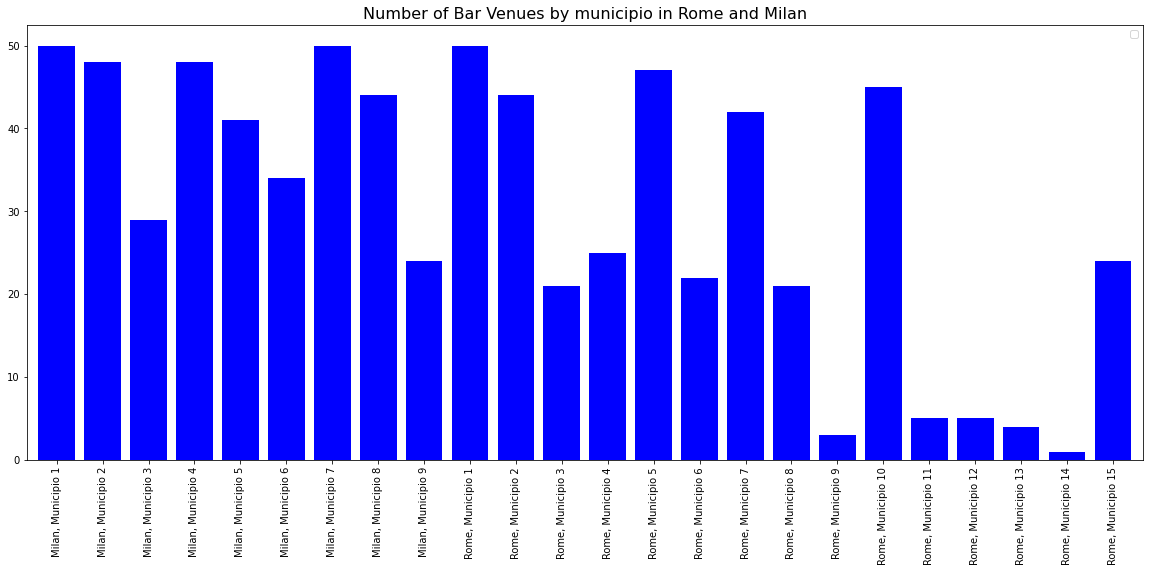

In [95]:
bars = df3['bar_venues']
y_pos = np.arange(len(bars))
rm_venues_plot = df3['bar_venues'].plot(kind = "bar", figsize = (20,8), width = 0.8, color='blue')
plt.title("Number of Bar Venues by municipio in Rome and Milan", fontsize = 16)
plt.legend([])
plt.xticks(np.arange(len(bars)),df3['name'])

Calculate the density of bar venues in each municipio.

In [96]:
df3['bar_venues_density'] = df3['bar_venues'] / (3.14 * df3['radius'] * df3['radius'])

Divide the municipi into four quartiles, according to the density of bar venues.

In [97]:
df3['bar_venues_cut'] = pd.qcut(df3['bar_venues_density'],4,['1st_quartile','2nd_quartile','3rd_quartile','4th_quartile'])

# ANALYZE VENUES IN A FIXED CATEGORY FOR EACH MUNICIPIO OF ROME AND MILAN

## FOOD

Use the function for Rome and Milan together.

In [98]:
rm_food_venues_grouped, rm_food_venues_top_ten = getTopTenVenues(numbers=rm_food_venues['municipio_number'],
                                   names=rm_food_venues['municipio_name'],
                                   latitudes=rm_food_venues['lat'],
                                   longitudes=rm_food_venues['lng'],
                                   cities=rm_food_venues['city'],
                                   radia=df3['radius'],
                                   categories = rm_food_venues['categories']
                                  )

Milan, Municipio 1
                  venue  freq
0           Pizza Place  0.16
1    Italian Restaurant  0.14
2                Bakery  0.12
3           Coffee Shop  0.10
4          Cocktail Bar  0.08
5                  Café  0.08
6          Dessert Shop  0.04
7           Pastry Shop  0.04
8  Fast Food Restaurant  0.04
9        Ice Cream Shop  0.04


Milan, Municipio 2
                venue  freq
0  Italian Restaurant  0.16
1         Pizza Place  0.16
2                Café  0.14
3   Trattoria/Osteria  0.08
4      Ice Cream Shop  0.06
5          Restaurant  0.06
6    Sushi Restaurant  0.04
7           Gastropub  0.02
8      Sandwich Place  0.02
9    Kebab Restaurant  0.02


Milan, Municipio 3
                  venue  freq
0                  Café  0.18
1    Italian Restaurant  0.11
2  Fast Food Restaurant  0.11
3                 Hotel  0.07
4           Coffee Shop  0.07
5           Pizza Place  0.07
6                Bistro  0.07
7                Bakery  0.04
8          Gourmet Shop  0.04
9

See the outputs.

In [99]:
rm_food_venues_grouped.head()

,city,municipio_name,municipio_number,Abruzzo Restaurant,African Restaurant,Agriturismo,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Cuban Restaurant,Cultural Center,Cupcake Shop,Dessert Shop,Diner,Dumpling Restaurant,Emilia Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food Court,Food Truck,Fried Chicken Joint,Gas Station,Gastropub,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Lebanese Restaurant,Lombard Restaurant,Lounge,Market,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,Noodle House,Pastry Shop,Piadineria,Pizza Place,Pub,Puglia Restaurant,Ramen Restaurant,Rest Area,Restaurant,Roman Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Sardinian Restaurant,Seafood Restaurant,Sicilian Restaurant,Snack Place,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,milan,"Milan, Municipio 1",1,0.00000,0.0,0.0,0.0,0.00,0.02,0.0,0.0,0.0,0.120000,0.02,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.02,0.0,0.080000,0.0,0.00000,0.080000,0.100000,0.0,0.0,0.0,0.00000,0.04,0.00000,0.0,0.0,0.0,0.0,0.040000,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.020000,0.00,0.00,0.000000,0.040000,0.0,0.0,0.140000,0.04,0.0,0.00000,0.00000,0.00000,0.00,0.00,0.00,0.0,0.00,0.0,0.040000,0.00,0.160000,0.0,0.0,0.0,0.0,0.020000,0.0,0.00000,0.0,0.020000,0.0,0.00000,0.00,0.00000,0.0,0.00,0.00000,0.00000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0
1,milan,"Milan, Municipio 2",2,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.020000,0.02,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.140000,0.0,0.02000,0.000000,0.020000,0.0,0.0,0.0,0.00000,0.00,0.00000,0.0,0.0,0.0,0.0,0.020000,0.02,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.02,0.0,0.0,0.000000,0.02,0.00,0.000000,0.060000,0.0,0.0,0.160000,0.00,0.0,0.02000,0.00000,0.00000,0.00,0.00,0.00,0.0,0.00,0.0,0.020000,0.02,0.160000,0.0,0.0,0.0,0.0,0.060000,0.0,0.00000,0.0,0.020000,0.0,0.02000,0.02,0.00000,0.0,0.02,0.04000,0.00000,0.00,0.00,0.080000,0.0,0.0,0.0,0.0
2,milan,"Milan, Municipio 3",3,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.035714,0.00,0.0,0.00,0.0,0.00,0.071429,0.0,0.035714,0.0,0.00000,0.0,0.0,0.00,0.0,0.178571,0.0,0.00000,0.035714,0.071429,0.0,0.0,0.0,0.00000,0.00,0.00000,0.0,0.0,0.0,0.0,0.107143,0.00,0.0,0.0,0.0,0.035714,0.0,0.00,0.0,0.00,0.0,0.0,0.035714,0.00,0.00,0.071429,0.035714,0.0,0.0,0.107143,0.00,0.0,0.00000,0.00000,0.00000,0.00,0.00,0.00,0.0,0.00,0.0,0.035714,0.00,0.071429,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.035714,0.0,0.00000,0.00,0.00000,0.0,0.00,0.00000,0.00000,0.00,0.00,0.035714,0.0,0.0,0.0,0.0
3,milan,"Milan, Municipio 4",4,0.00000,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.020000,0.02,0.0,0.04,0.0,0.02,0.040000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.120000,0.0,0.00000,0.000000,0.020000,0.0,0.0,0.0,0.00000,0.02,0.00000,0.0,0.0,0.0,0.0,0.020000,0.00,0.0,0.0,0.0,0.000000,0.0,0.02,0.0,0.04,0.0,0.0,0.000000,0.00,0.02,0.000000,0.000000,0.0,0.0,0.120000,0.02,0.0,0.00000,0.00000,0.00000,0.02,0.02,0.02,0.0,0.02,0.0,0.020000,0.00,0.180000,0.0,0.0,0.0,0.0,0.020000,0.0,0.00000,0.0,0.020000,0.0,0.02000,0.00,0.00000,0.0,0.00,0.04000,0.00000,0.02,0.02,0.020000,0.0,0.0,0.0,0.0
4,milan,"Milan, Municipio 5",5,0.02381,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.023810,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.02381,0.0,0.0,0.00,0.0,0.166667,0.0,0.02381,0.000000,0.023810,0.0,0.0,0.0,0.02381,0.00,0.02381,0.0,0.0,0.0,0.0,0

In [100]:
rm_food_venues_top_ten.head()

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
0,1,milan,Pizza Place,Italian Restaurant,Bakery,Coffee Shop,Café,Cocktail Bar,Japanese Restaurant,Dessert Shop,Ice Cream Shop,Pastry Shop,"Milan, Municipio 1"
1,2,milan,Italian Restaurant,Pizza Place,Café,Trattoria/Osteria,Ice Cream Shop,Restaurant,Sushi Restaurant,Gastropub,Bar,Greek Restaurant,"Milan, Municipio 2"
2,3,milan,Café,Fast Food Restaurant,Italian Restaurant,Hotel,Coffee Shop,Pizza Place,Bistro,Pastry Shop,Sandwich Place,Gourmet Shop,"Milan, Municipio 3"
3,4,milan,Pizza Place,Café,Italian Restaurant,Gastropub,Bistro,Sushi Restaurant,Beer Bar,Hostel,Coffee Shop,Restaurant,"Milan, Municipio 4"
4,5,milan,Italian Restaurant,Café,Pizza Place,Restaurant,Fast Food Restaurant,Abruzzo Restaurant,Cupcake Shop,Lebanese Restaurant,Kebab Restaurant,Breakfast Spot,"Milan, Municipio 5"


## BAR

Use the function for Rome and Milan together.

In [101]:
rm_bar_venues_grouped, rm_bar_venues_top_ten = getTopTenVenues(numbers=rm_bar_venues['municipio_number'],
                                   names=rm_bar_venues['municipio_name'],
                                   latitudes=rm_bar_venues['lat'],
                                   longitudes=rm_bar_venues['lng'],
                                   cities=rm_bar_venues['city'],
                                   radia=df3['radius'],
                                   categories = rm_bar_venues['categories']
                                  )

Milan, Municipio 1
                 venue  freq
0         Cocktail Bar  0.36
1                  Bar  0.16
2             Wine Bar  0.10
3                 Café  0.08
4   Italian Restaurant  0.04
5            Nightclub  0.04
6                  Pub  0.04
7               Hostel  0.02
8        Grocery Store  0.02
9  Fried Chicken Joint  0.02


Milan, Municipio 2
             venue  freq
0              Bar  0.33
1     Cocktail Bar  0.12
2              Pub  0.08
3        Nightclub  0.08
4  Other Nightlife  0.08
5         Beer Bar  0.06
6          Brewery  0.02
7       Restaurant  0.02
8        Rock Club  0.02
9       Hookah Bar  0.02


Milan, Municipio 3
                venue  freq
0        Cocktail Bar  0.24
1                Café  0.14
2                 Bar  0.07
3                 Pub  0.07
4             Brewery  0.07
5  Italian Restaurant  0.03
6         Music Venue  0.03
7           Nightclub  0.03
8     Other Nightlife  0.03
9           Hotel Bar  0.03


Milan, Municipio 4
                

See the outputs.

In [102]:
rm_bar_venues_grouped.head()

,city,municipio_name,municipio_number,American Restaurant,BBQ Joint,Bar,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Café,Cocktail Bar,Coffee Shop,Diner,Dive Bar,Event Space,Fried Chicken Joint,Gastropub,Gay Bar,General Entertainment,Grocery Store,Hookah Bar,Hostel,Hotel,Hotel Bar,Internet Cafe,Irish Pub,Italian Restaurant,Jazz Club,Karaoke Bar,Lounge,Medical Center,Moroccan Restaurant,Music Venue,Nightclub,Nightlife Spot,Office,Other Nightlife,Performing Arts Venue,Piano Bar,Pizza Place,Pub,Restaurant,Rock Club,Roof Deck,Sake Bar,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Speakeasy,Sports Bar,Strip Club,Sushi Restaurant,Tennis Court,Whisky Bar,Wine Bar,Wine Shop,Winery
0,milan,"Milan, Municipio 1",1,0.0,0.0,0.160000,0.0,0.0,0.000000,0.000000,0.02,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.080000,0.360000,0.02,0.0,0.00000,0.0,0.02,0.000000,0.0,0.000000,0.02,0.000000,0.020000,0.0,0.000000,0.000000,0.0,0.040000,0.0,0.000000,0.020000,0.0,0.0,0.000000,0.040000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.040000,0.000000,0.000000,0.0,0.0,0.02,0.0,0.0,0.000000,0.02,0.000000,0.02,0.0,0.000000,0.100000,0.000000,0.0
1,milan,"Milan, Municipio 2",2,0.0,0.0,0.333333,0.0,0.0,0.062500,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.020833,0.0,0.000000,0.125000,0.00,0.0,0.00000,0.0,0.00,0.000000,0.0,0.020833,0.00,0.020833,0.000000,0.0,0.020833,0.020833,0.0,0.000000,0.0,0.020833,0.000000,0.0,0.0,0.000000,0.083333,0.00000,0.0,0.083333,0.0,0.0,0.000000,0.083333,0.020833,0.020833,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.020833,0.00,0.0,0.000000,0.020833,0.020833,0.0
2,milan,"Milan, Municipio 3",3,0.0,0.0,0.068966,0.0,0.0,0.000000,0.000000,0.00,0.034483,0.034483,0.0,0.0,0.068966,0.0,0.137931,0.241379,0.00,0.0,0.00000,0.0,0.00,0.000000,0.0,0.000000,0.00,0.034483,0.000000,0.0,0.034483,0.000000,0.0,0.034483,0.0,0.000000,0.034483,0.0,0.0,0.034483,0.034483,0.00000,0.0,0.034483,0.0,0.0,0.034483,0.068966,0.000000,0.034483,0.0,0.0,0.00,0.0,0.0,0.034483,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0
3,milan,"Milan, Municipio 4",4,0.0,0.0,0.104167,0.0,0.0,0.083333,0.020833,0.00,0.000000,0.000000,0.0,0.0,0.062500,0.0,0.041667,0.229167,0.00,0.0,0.00000,0.0,0.00,0.020833,0.0,0.000000,0.00,0.020833,0.020833,0.0,0.000000,0.000000,0.0,0.020833,0.0,0.000000,0.020833,0.0,0.0,0.020833,0.125000,0.00000,0.0,0.041667,0.0,0.0,0.000000,0.062500,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.020833,0.083333,0.000000,0.0
4,milan,"Milan, Municipio 5",5,0.0,0.0,0.195122,0.0,0.0,0.024390,0.000000,0.00,0.000000,0.000000,0.0,0.0,0.024390,0.0,0.097561,0.170732,0.00,0.0,0.04878,0.0,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.0,0.048780,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.024390,0.073171,0.02439,0.0,0.097561,0.0,0.0,0.000000,0.121951,0.024390,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.024390,0.000000,0.0


In [103]:
rm_bar_venues_top_ten.head()

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
0,1,milan,Cocktail Bar,Bar,Wine Bar,Café,Pub,Italian Restaurant,Nightclub,Sandwich Place,Beer Store,Hostel,"Milan, Municipio 1"
1,2,milan,Bar,Cocktail Bar,Nightclub,Other Nightlife,Pub,Beer Bar,Brewery,Rock Club,General Entertainment,Hotel Bar,"Milan, Municipio 2"
2,3,milan,Cocktail Bar,Café,Pub,Bar,Brewery,Music Venue,Bistro,Rock Club,Lounge,Boutique,"Milan, Municipio 3"
3,4,milan,Cocktail Bar,Nightclub,Bar,Wine Bar,Beer Bar,Pub,Brewery,Other Nightlife,Café,Hookah Bar,"Milan, Municipio 4"
4,5,milan,Bar,Cocktail Bar,Pub,Other Nightlife,Café,Nightclub,Hotel Bar,Dive Bar,Brewery,Wine Bar,"Milan, Municipio 5"


# CLUSTERING MUNICIPI BY VENUES IN A FIXED CATEGORY

## FOOD

Choose the best number of clusters with the Elbow method point.

In [104]:
rm_food_venues_clustering = rm_food_venues_grouped.drop(['municipio_number', 'municipio_name', 'city'], axis = 1) 
inertias = []
for k in range (1, 11):
    kclusters = k
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rm_food_venues_clustering)
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans.labels_
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans.inertia_
    inertias.append(inertia)
inertias

[0.998175306635084,
 0.6540880884999367,
 0.5358887836820546,
 0.4617614994269226,
 0.40245541191604983,
 0.36052551162131,
 0.3261272324529014,
 0.2873069849827698,
 0.2585056776509324,
 0.22095513060632133]

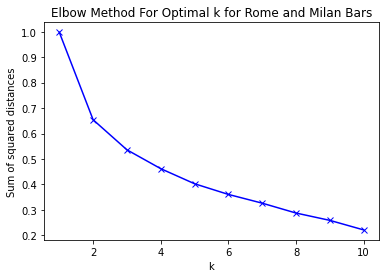

In [105]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k for Rome and Milan Bars')
plt.show()

Run KMeans with K=5.

In [106]:
rm_food_kclusters = 5
rm_food_venues_kmeans = KMeans(n_clusters=rm_food_kclusters, random_state=0).fit(rm_food_venues_clustering)
rm_food_venues_clusters = rm_food_venues_kmeans.labels_
rm_food_venues_clusters

array([1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 3, 4, 2, 2, 2, 4, 4, 2, 4, 4, 3,
       0, 4])

In [107]:
rm_food_venues_clusters_rome= rm_food_venues_clusters[9:]
rm_food_venues_clusters_milan= rm_food_venues_clusters[:9]

Add the cluster to the dataframe

In [108]:
rm_food_venues_top_ten.insert(0, 'food_cluster', rm_food_venues_clusters)
df1['food_cluster']=rm_food_venues_clusters_rome
df2['food_cluster']=rm_food_venues_clusters_milan
df3['food_cluster']=rm_food_venues_clusters

Print maps to visualize.

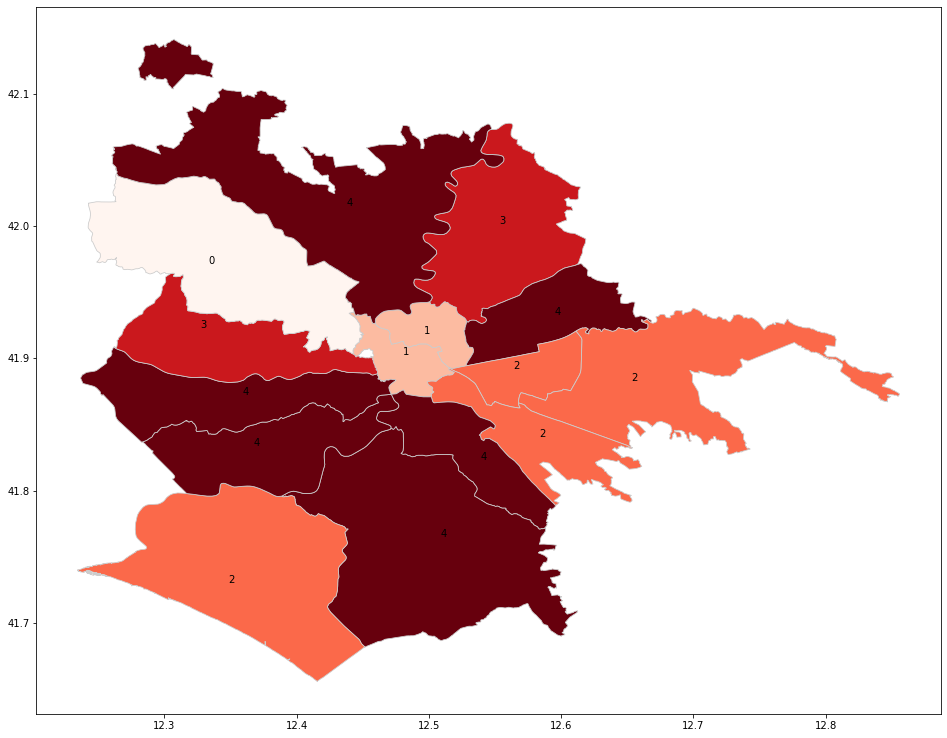

In [109]:
variable = 'food_cluster'
df1.set_geometry(col = 'shape').plot(column = variable, cmap='Reds', linewidth=0.8, edgecolor='0.8', figsize=(40, 13))

for idx, row in df1.set_geometry(col = 'shape').iterrows():
    plt.annotate(s=row['food_cluster'], xy=row['repr_point_coordinates'],horizontalalignment='center')

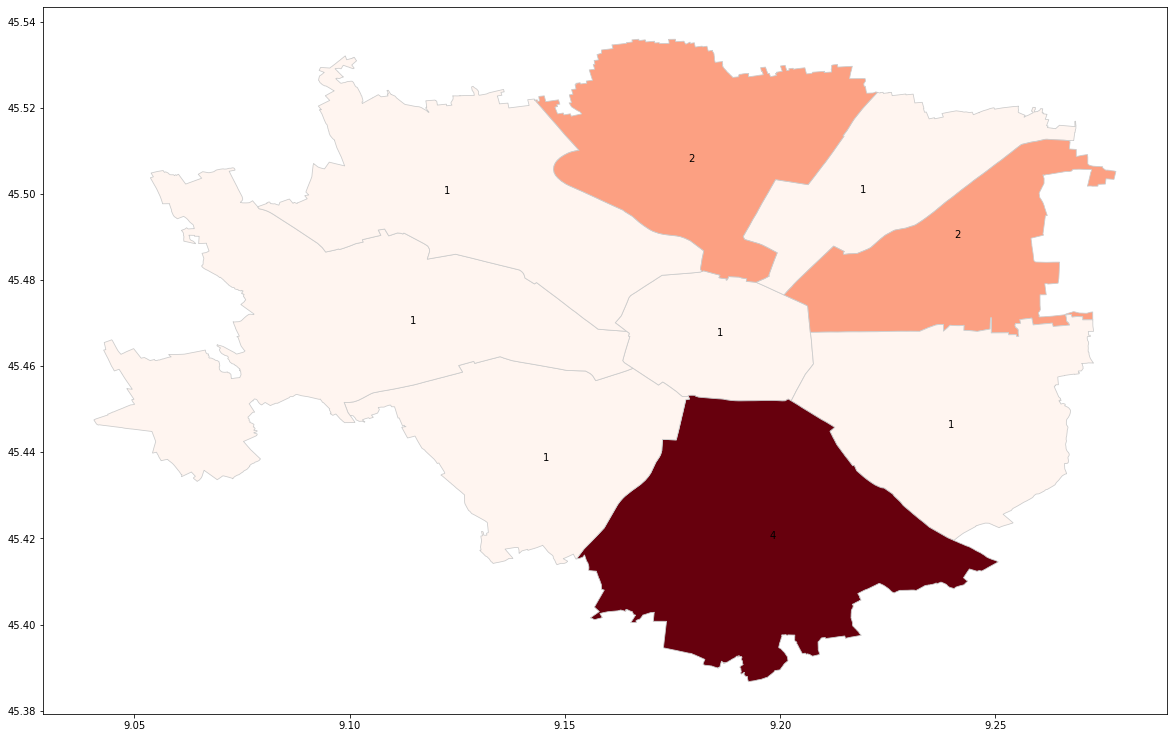

In [110]:
variable = 'food_cluster'
df2.set_geometry(col = 'shape').plot(column = variable, cmap='Reds', linewidth=0.8, edgecolor='0.8', figsize=(40, 13))

for idx, row in df2.set_geometry(col = 'shape').iterrows():
    plt.annotate(s=row['food_cluster'], xy=row['repr_point_coordinates'],horizontalalignment='center')

In [111]:
rome_food_clusters_map2 = folium.Map(location=[rome_latitude, rome_longitude], zoom_start=10)
rm_food_clusters_colors = get_colors(rm_food_kclusters)
for lat, lon, poi, cluster in zip(df1['repr_point_latitude'], df1['repr_point_longitude'], df1['name'], df1['food_cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rm_food_clusters_colors[cluster],
        fill=True,
        fill_color=rm_food_clusters_colors[cluster],
        fill_opacity=0.7).add_to(rome_food_clusters_map2)
       
rome_food_clusters_map2

In [112]:
milan_food_clusters2_map = folium.Map(location=[milan_latitude, milan_longitude], zoom_start=12)
for lat, lon, poi, cluster in zip(df2['repr_point_latitude'], df2['repr_point_longitude'], df2['name'], df2['food_cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rm_food_clusters_colors[cluster],
        fill=True,
        fill_color=rm_food_clusters_colors[cluster],
        fill_opacity=0.7).add_to(milan_food_clusters2_map)
       
milan_food_clusters2_map

Examine clusters.

In [113]:
rm_food_venues_top_ten.loc[rm_food_venues_top_ten['food_cluster'] == 0, rm_food_venues_top_ten.columns[[1,2] + list(range(3, rm_food_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
14,14,rome,Italian Restaurant,Pizza Place,Restaurant,Wine Shop,Dessert Shop,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,"Rome, Municipio 14"


In [114]:
rm_food_venues_top_ten.loc[rm_food_venues_top_ten['food_cluster'] == 1, rm_food_venues_top_ten.columns[[1,2] + list(range(3, rm_food_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
0,1,milan,Pizza Place,Italian Restaurant,Bakery,Coffee Shop,Café,Cocktail Bar,Japanese Restaurant,Dessert Shop,Ice Cream Shop,Pastry Shop,"Milan, Municipio 1"
1,2,milan,Italian Restaurant,Pizza Place,Café,Trattoria/Osteria,Ice Cream Shop,Restaurant,Sushi Restaurant,Gastropub,Bar,Greek Restaurant,"Milan, Municipio 2"
3,4,milan,Pizza Place,Café,Italian Restaurant,Gastropub,Bistro,Sushi Restaurant,Beer Bar,Hostel,Coffee Shop,Restaurant,"Milan, Municipio 4"
5,6,milan,Italian Restaurant,Café,Pizza Place,Fast Food Restaurant,Cocktail Bar,Coffee Shop,Pastry Shop,Dessert Shop,Wine Bar,Argentinian Restaurant,"Milan, Municipio 6"
6,7,milan,Pizza Place,Café,Italian Restaurant,Burger Joint,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Ice Cream Shop,Gastropub,Chinese Restaurant,"Milan, Municipio 7"
7,8,milan,Café,Italian Restaurant,Pizza Place,Restaurant,Fast Food Restaurant,Coffee Shop,Asian Restaurant,Ice Cream Shop,Mexican Restaurant,Chinese Restaurant,"Milan, Municipio 8"
9,1,rome,Italian Restaurant,Ice Cream Shop,Café,Wine Bar,Pizza Place,Dessert Shop,Restaurant,Coffee Shop,Sandwich Place,Irish Pub,"Rome, Municipio 1"
16,2,rome,Italian Restaurant,Pizza Place,Café,Ice Cream Shop,Restaurant,Coffee Shop,Sushi Restaurant,Steakhouse,Turkish Restaurant,Middle Eastern Restaurant,"Rome, Municipio 2"


In [115]:
rm_food_venues_top_ten.loc[rm_food_venues_top_ten['food_cluster'] == 2, rm_food_venues_top_ten.columns[[1,2] + list(range(3, rm_food_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
2,3,milan,Café,Fast Food Restaurant,Italian Restaurant,Hotel,Coffee Shop,Pizza Place,Bistro,Pastry Shop,Sandwich Place,Gourmet Shop,"Milan, Municipio 3"
8,9,milan,Café,Bakery,Pizza Place,Italian Restaurant,Cocktail Bar,Bagel Shop,Coffee Shop,Puglia Restaurant,Emilia Restaurant,Brewery,"Milan, Municipio 9"
19,5,rome,Café,Italian Restaurant,Ice Cream Shop,Pizza Place,Bistro,Sandwich Place,Trattoria/Osteria,Bakery,Fast Food Restaurant,Noodle House,"Rome, Municipio 5"
20,6,rome,Café,Pizza Place,Coffee Shop,Restaurant,Italian Restaurant,Pastry Shop,Bakery,Chinese Restaurant,Ice Cream Shop,Sandwich Place,"Rome, Municipio 6"
21,7,rome,Café,Pizza Place,Food Court,Italian Restaurant,Fast Food Restaurant,Bakery,Cupcake Shop,Burger Joint,Bistro,Fried Chicken Joint,"Rome, Municipio 7"
10,10,rome,Café,Italian Restaurant,Seafood Restaurant,Beach,Pizza Place,Fast Food Restaurant,Restaurant,Burger Joint,Bakery,Fish Market,"Rome, Municipio 10"


In [116]:
rm_food_venues_top_ten.loc[rm_food_venues_top_ten['food_cluster'] == 3, rm_food_venues_top_ten.columns[[1,2] + list(range(3, rm_food_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
17,3,rome,Café,Pizza Place,Italian Restaurant,Diner,Bakery,Fast Food Restaurant,Ice Cream Shop,Gastropub,Coffee Shop,Burger Joint,"Rome, Municipio 3"
13,13,rome,Pizza Place,Café,Italian Restaurant,Steakhouse,Seafood Restaurant,Chinese Restaurant,Coffee Shop,Restaurant,Bar,Caribbean Restaurant,"Rome, Municipio 13"


In [117]:
rm_food_venues_top_ten.loc[rm_food_venues_top_ten['food_cluster'] == 4, rm_food_venues_top_ten.columns[[1,2] + list(range(3, rm_food_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
4,5,milan,Italian Restaurant,Café,Pizza Place,Restaurant,Fast Food Restaurant,Abruzzo Restaurant,Cupcake Shop,Lebanese Restaurant,Kebab Restaurant,Breakfast Spot,"Milan, Municipio 5"
18,4,rome,Café,Restaurant,Italian Restaurant,Pizza Place,Fast Food Restaurant,Bakery,Gastropub,Ice Cream Shop,Dessert Shop,Food Truck,"Rome, Municipio 4"
22,8,rome,Café,Italian Restaurant,Pizza Place,Restaurant,Diner,Gastropub,Trattoria/Osteria,Dessert Shop,Chinese Restaurant,Pub,"Rome, Municipio 8"
23,9,rome,Café,Restaurant,Italian Restaurant,Pizza Place,Ice Cream Shop,German Restaurant,Bakery,Food Court,Diner,Food,"Rome, Municipio 9"
11,11,rome,Café,Pizza Place,Restaurant,Italian Restaurant,Diner,Buffet,Pastry Shop,Sandwich Place,Food,Event Space,"Rome, Municipio 11"
12,12,rome,Italian Restaurant,Café,Restaurant,Pizza Place,Cafeteria,Bakery,Gastropub,Sandwich Place,Gas Station,Gluten-free Restaurant,"Rome, Municipio 12"
15,15,rome,Italian Restaurant,Café,Pizza Place,Restaurant,Ice Cream Shop,Asian Restaurant,Coffee Shop,Comfort Food Restaurant,Kebab Restaurant,Diner,"Rome, Municipio 15"


## BAR

Choose the best number of clusters with the Elbow method point.

In [118]:
rm_bar_venues_clustering = rm_bar_venues_grouped.drop(['municipio_number', 'municipio_name', 'city'], axis = 1) 
inertias = []
for k in range (1, 11):
    kclusters = k
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rm_bar_venues_clustering)
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans.labels_
    # Sum of distances of samples to their closest cluster center
    inertia = kmeans.inertia_
    inertias.append(inertia)
inertias

[2.972718438098857,
 2.0785182804329962,
 1.396005077408445,
 1.0684177272102686,
 0.8818213770400365,
 0.6906959084294633,
 0.5433232536003021,
 0.45039152036378566,
 0.37982273931780103,
 0.32099303222835374]

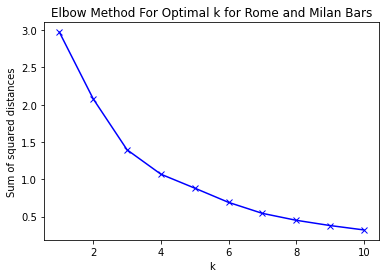

In [119]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k for Rome and Milan Bars')
plt.show()

Run KMeans with K=4.

In [120]:
rm_bar_kclusters = 4
rm_bar_venues_kmeans = KMeans(n_clusters=rm_bar_kclusters, random_state=0).fit(rm_bar_venues_clustering)
rm_bar_venues_clusters = rm_bar_venues_kmeans.labels_
rm_bar_venues_clusters

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       3, 0])

In [121]:
rm_bar_venues_clusters_rome= rm_bar_venues_clusters[9:]
rm_bar_venues_clusters_milan= rm_bar_venues_clusters[:9]

Add the cluster to the dataframe

In [122]:
rm_bar_venues_top_ten.insert(0, 'bar_cluster', rm_bar_venues_clusters)
df1['bar_cluster']=rm_bar_venues_clusters_rome
df2['bar_cluster']=rm_bar_venues_clusters_milan
df3['bar_cluster']=rm_bar_venues_clusters

Print a maps to visualize.

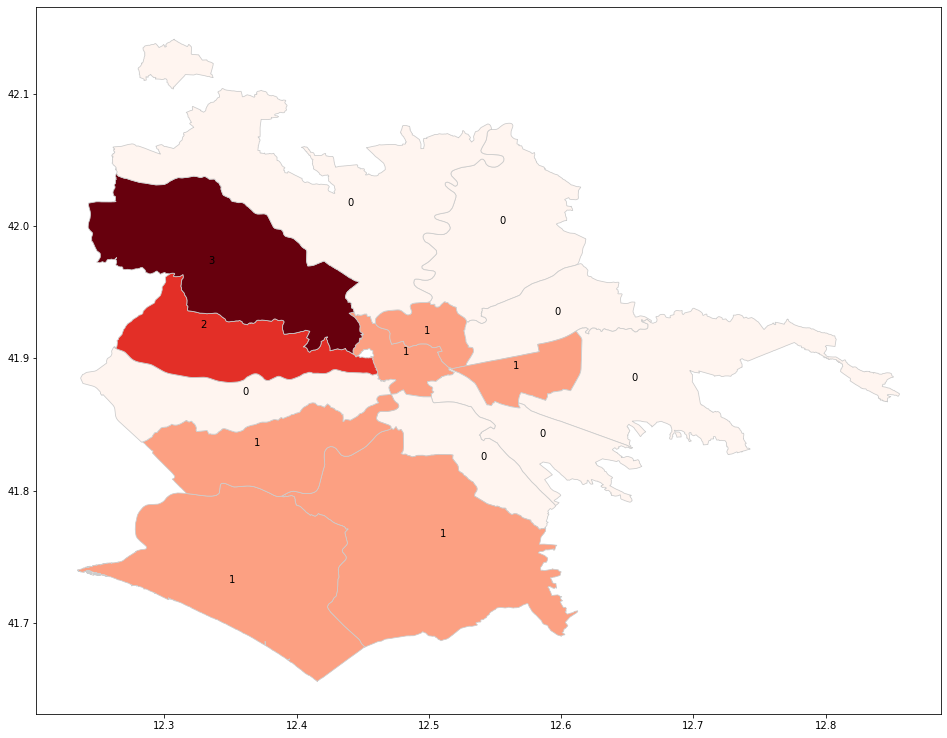

In [123]:
variable = 'bar_cluster'
df1.set_geometry(col = 'shape').plot(column = variable, cmap='Reds', linewidth=0.8, edgecolor='0.8', figsize=(40, 13))

for idx, row in df1.set_geometry(col = 'shape').iterrows():
    plt.annotate(s=row['bar_cluster'], xy=row['repr_point_coordinates'],horizontalalignment='center')

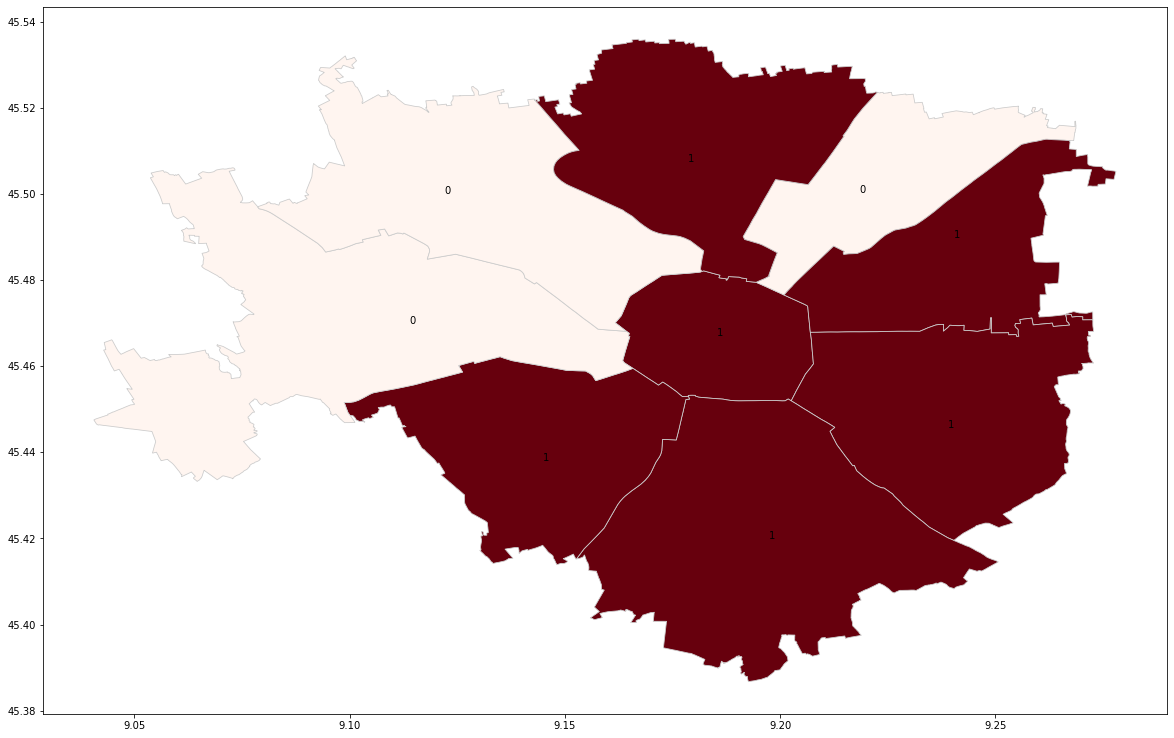

In [124]:
variable = 'bar_cluster'
df2.set_geometry(col = 'shape').plot(column = variable, cmap='Reds', linewidth=0.8, edgecolor='0.8', figsize=(40, 13))

for idx, row in df2.set_geometry(col = 'shape').iterrows():
    plt.annotate(s=row['bar_cluster'], xy=row['repr_point_coordinates'],horizontalalignment='center')

In [125]:
rome_bar_clusters_map2 = folium.Map(location=[rome_latitude, rome_longitude], zoom_start=10)
rm_bar_clusters_colors = get_colors(rm_bar_kclusters)
for lat, lon, poi, cluster in zip(df1['repr_point_latitude'], df1['repr_point_longitude'], df1['name'], df1['bar_cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rm_bar_clusters_colors[cluster],
        fill=True,
        fill_color=rm_bar_clusters_colors[cluster],
        fill_opacity=0.7).add_to(rome_bar_clusters_map2)
       
rome_bar_clusters_map2

In [126]:
milan_bar_clusters2_map = folium.Map(location=[milan_latitude, milan_longitude], zoom_start=12)
for lat, lon, poi, cluster in zip(df2['repr_point_latitude'], df2['repr_point_longitude'], df2['name'], df2['bar_cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rm_bar_clusters_colors[cluster],
        fill=True,
        fill_color=rm_bar_clusters_colors[cluster],
        fill_opacity=0.7).add_to(milan_bar_clusters2_map)
       
milan_bar_clusters2_map

Examine clusters.

In [127]:
rm_bar_venues_top_ten.loc[rm_bar_venues_top_ten['bar_cluster'] == 0, rm_bar_venues_top_ten.columns[[1,2] + list(range(3, rm_bar_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
1,2,milan,Bar,Cocktail Bar,Nightclub,Other Nightlife,Pub,Beer Bar,Brewery,Rock Club,General Entertainment,Hotel Bar,"Milan, Municipio 2"
6,7,milan,Bar,Pub,Nightclub,Brewery,Lounge,Strip Club,Pizza Place,Cocktail Bar,Wine Bar,Speakeasy,"Milan, Municipio 7"
7,8,milan,Nightclub,Bar,Pub,Lounge,Other Nightlife,Café,Strip Club,Sports Bar,Moroccan Restaurant,Cocktail Bar,"Milan, Municipio 8"
17,3,rome,Bar,Pub,Nightclub,Brewery,Lounge,Cocktail Bar,Beer Garden,Speakeasy,Café,Grocery Store,"Rome, Municipio 3"
18,4,rome,Bar,Pub,Nightclub,Strip Club,Hotel Bar,Lounge,Brewery,Gay Bar,Other Nightlife,Performing Arts Venue,"Rome, Municipio 4"
20,6,rome,Bar,Other Nightlife,Nightclub,Hookah Bar,Whisky Bar,Strip Club,Café,Gay Bar,Beer Garden,Lounge,"Rome, Municipio 6"
21,7,rome,Pub,Bar,Dive Bar,Nightclub,Hookah Bar,Wine Bar,Lounge,Cocktail Bar,Other Nightlife,Hotel,"Rome, Municipio 7"
22,8,rome,Bar,Pub,Nightclub,Lounge,Other Nightlife,Rock Club,Medical Center,Cocktail Bar,Beer Garden,Gay Bar,"Rome, Municipio 8"
12,12,rome,Pub,Bar,Wine Bar,Gastropub,Coffee Shop,Diner,Dive Bar,Event Space,Fried Chicken Joint,General Entertainment,"Rome, Municipio 12"
15,15,rome,Nightclub,Bar,Cocktail Bar,Pub,Beer Garden,Restaurant,Café,Wine Bar,General Entertainment,Grocery Store,"Rome, Municipio 15"


In [128]:
rm_bar_venues_top_ten.loc[rm_bar_venues_top_ten['bar_cluster'] == 1, rm_bar_venues_top_ten.columns[[1,2] + list(range(3, rm_bar_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
0,1,milan,Cocktail Bar,Bar,Wine Bar,Café,Pub,Italian Restaurant,Nightclub,Sandwich Place,Beer Store,Hostel,"Milan, Municipio 1"
2,3,milan,Cocktail Bar,Café,Pub,Bar,Brewery,Music Venue,Bistro,Rock Club,Lounge,Boutique,"Milan, Municipio 3"
3,4,milan,Cocktail Bar,Nightclub,Bar,Wine Bar,Beer Bar,Pub,Brewery,Other Nightlife,Café,Hookah Bar,"Milan, Municipio 4"
4,5,milan,Bar,Cocktail Bar,Pub,Other Nightlife,Café,Nightclub,Hotel Bar,Dive Bar,Brewery,Wine Bar,"Milan, Municipio 5"
5,6,milan,Cocktail Bar,Bar,Lounge,Wine Bar,Café,Pub,Restaurant,Event Space,Seafood Restaurant,Beer Garden,"Milan, Municipio 6"
8,9,milan,Pub,Brewery,Cocktail Bar,Beer Bar,Bar,Italian Restaurant,Hotel Bar,Café,Karaoke Bar,Lounge,"Milan, Municipio 9"
9,1,rome,Bar,Italian Restaurant,Pub,Wine Bar,Cocktail Bar,Brewery,Lounge,Irish Pub,Bistro,Café,"Rome, Municipio 1"
16,2,rome,Cocktail Bar,Bar,Pub,Lounge,Nightclub,Café,Wine Bar,Hotel Bar,Strip Club,Other Nightlife,"Rome, Municipio 2"
19,5,rome,Nightclub,Cocktail Bar,Bar,Brewery,Lounge,Other Nightlife,Pub,Beer Bar,Burger Joint,Restaurant,"Rome, Municipio 5"
23,9,rome,Pub,Other Nightlife,Cocktail Bar,Internet Cafe,Hotel,Hostel,Hookah Bar,Grocery Store,General Entertainment,Gay Bar,"Rome, Municipio 9"


In [129]:
rm_bar_venues_top_ten.loc[rm_bar_venues_top_ten['bar_cluster'] == 2, rm_bar_venues_top_ten.columns[[1,2] + list(range(3, rm_bar_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
13,13,rome,Bar,Winery,Cocktail Bar,Hotel Bar,Hotel,Hostel,Hookah Bar,Grocery Store,General Entertainment,Gay Bar,"Rome, Municipio 13"


In [130]:
rm_bar_venues_top_ten.loc[rm_bar_venues_top_ten['bar_cluster'] == 3, rm_bar_venues_top_ten.columns[[1,2] + list(range(3, rm_bar_venues_top_ten.shape[1]))]]

,municipio_number,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,municipio_name
14,14,rome,Nightclub,Winery,Cocktail Bar,Hotel,Hostel,Hookah Bar,Grocery Store,General Entertainment,Gay Bar,Gastropub,"Rome, Municipio 14"


# TRANSPORTS AND FUN

A function to get nearby venues of more than a fixed category of each municipio.

In [131]:
def getAllNearbyVenuesByCategories(numbers, names, categories, latitudes, longitudes, cities, radia, limit):


    venues_list=[]
    for number, name, lat, lng, city, radius in zip(numbers, names, latitudes, longitudes, cities, radia):
        print(name)
        
        for cat in categories:
            # define URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                lat,
                lng,
                cat,
                radius,
                limit)
            

                
            # make the GET request
            results = requests.get(url).json()['response']['venues']
    
            # return only relevant information for each nearby venue
            venues_list.append([(
                city,
                number,
                name, 
                v['name'],
                v['id'],
                v['location']['lat'],
                v['location']['lng'],
                v['location']['distance'],
                v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city',
                             'municipio_number',
                             'municipio_name',
                             'name',
                             'id',
                             'lat', 
                             'lng',
                             'distance',
                             'categories']
    
    return(nearby_venues)

## TRANSPORTS

Set all the categories that we need.

In [132]:
metro_id = '4bf58dd8d48988d1fd931735' 
ferr_id = '4bf58dd8d48988d129951735'
tram_id = '52f2ab2ebcbc57f1066b8b51'
autobus_id = '52f2ab2ebcbc57f1066b8b4f'
autost_id = '4bf58dd8d48988d1fe931735'
fly_id = '4bf58dd8d48988d1ed931735'
transp_cat_id = {'cat_id': [metro_id, tram_id , autobus_id, autost_id, ferr_id, fly_id]}

Use the previous function.

In [133]:
rm_transp_venues = getAllNearbyVenuesByCategories(numbers = df3['number'],
                                               names = df3['name'],
                                               categories = transp_cat_id['cat_id'],
                                               latitudes = df3['repr_point_latitude'],
                                               longitudes = df3['repr_point_longitude'],
                                               cities = df3['city'],
                                               radia = df3['radius'],
                                               limit = 300)
rm_transp_venues = rm_transp_venues.drop_duplicates('id', keep='first').reset_index(drop=True)
print('{} venues were returned by Foursquare, divided into {} uniques categories.'.format(rm_transp_venues.shape[0], len(rm_transp_venues['categories'].unique())))

Milan, Municipio 1
Milan, Municipio 2
Milan, Municipio 3
Milan, Municipio 4
Milan, Municipio 5
Milan, Municipio 6
Milan, Municipio 7
Milan, Municipio 8
Milan, Municipio 9
Rome, Municipio 1
Rome, Municipio 2
Rome, Municipio 3
Rome, Municipio 4
Rome, Municipio 5
Rome, Municipio 6
Rome, Municipio 7
Rome, Municipio 8
Rome, Municipio 9
Rome, Municipio 10
Rome, Municipio 11
Rome, Municipio 12
Rome, Municipio 13
Rome, Municipio 14
Rome, Municipio 15
1410 venues were returned by Foursquare, divided into 18 uniques categories.


See all the different categories retrieved.

In [134]:
rm_transp_venues['categories'].unique()

array(['Metro Station', 'Tourist Information Center', 'Tram Station',
       'Bus Line', 'Bus Stop', 'Bus Station', 'Train Station', 'Platform',
       'Airport Service', 'General Travel', 'Airport Terminal', 'Airport',
       'Airport Lounge', 'Airport Gate', 'Baggage Claim', 'Plaza',
       'Parking', 'Light Rail Station'], dtype=object)

See the output.

In [135]:
rm_transp_venues.head()

,city,municipio_number,municipio_name,name,id,lat,lng,distance,categories
0,milan,1,"Milan, Municipio 1",Metro Cordusio (M1),4bc89e3caf07a593903f812d,45.465277,9.186473,205,Metro Station
1,milan,1,"Milan, Municipio 1","Metro Duomo (M1, M3)",4bb1a59ff964a5206c9d3ce3,45.463969,9.189005,420,Metro Station
2,milan,1,"Milan, Municipio 1","Metro Cadorna FN Triennale (M1, M2)",4bf04238c8d920a1c7a49430,45.468156,9.175946,791,Metro Station
3,milan,1,"Milan, Municipio 1",Metro Sant'Ambrogio (M2),4c167416a81db713f2aa85e7,45.461653,9.173352,1156,Metro Station
4,milan,1,"Milan, Municipio 1",Metro San Babila (M1),4c19e09195e89521621d57e7,45.466776,9.197717,917,Metro Station


Prepare a dataframe with the information that we need.

In [136]:
rm_bus_stops = rm_transp_venues[(rm_transp_venues['categories']=='Bus Stop') | (rm_transp_venues['categories']=='Bus Line') | (rm_transp_venues['categories']=='Bus Station')].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_bus_stops.rename(columns={'name':'bus_stops', 'distance':'average_distance_bus_stops'}, inplace=True)
rm_tram_stations = rm_transp_venues[rm_transp_venues['categories']=='Tram Station'].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_tram_stations.rename(columns={'name':'tram_stations', 'distance':'average_distance_tram_stations'}, inplace=True)
rm_metro_stations = rm_transp_venues[rm_transp_venues['categories']=='Metro Station'].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_metro_stations.rename(columns={'name':'metro_stations', 'distance':'average_distance_metro_stations'}, inplace=True)
rm_train_stations = rm_transp_venues[(rm_transp_venues['categories']=='Train Station') | (rm_transp_venues['categories']=='Light Rail Station') ].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_train_stations.rename(columns={'name':'train_stations', 'distance':'average_distance_train_stations'}, inplace=True)
rm_airports = rm_transp_venues[rm_transp_venues['categories']=='Airport'].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_airports.rename(columns={'name':'airports', 'distance':'average_distance_airports'}, inplace=True)
rm_transp_distances = pd.merge(rm_bus_stops, rm_tram_stations, how='outer', on=['city','municipio_number'])
rm_transp_distances = pd.merge(rm_transp_distances,rm_metro_stations, how='outer', on=['city','municipio_number'])
rm_transp_distances = pd.merge(rm_transp_distances,rm_train_stations, how='outer', on=['city','municipio_number'])
rm_transp_distances= pd.merge(rm_transp_distances,rm_airports, how='outer', on=['city','municipio_number']).fillna(0)
rm_transp_distances['tot_venues']= rm_transp_distances['bus_stops']+rm_transp_distances['tram_stations']+rm_transp_distances['metro_stations']+rm_transp_distances['train_stations']+rm_transp_distances['airports']
rm_transp_distances.sort_values(by = ['city','municipio_number'], axis = 0, inplace = True)
rm_transp_distances

,city,municipio_number,bus_stops,average_distance_bus_stops,tram_stations,average_distance_tram_stations,metro_stations,average_distance_metro_stations,train_stations,average_distance_train_stations,airports,average_distance_airports,tot_venues
0,milan,1,72,845.0,49.0,751.0,19.0,625.0,2.0,878.5,0.0,0.0,142.0
1,milan,2,24,1027.0,5.0,1038.0,4.0,630.5,1.0,1448.0,0.0,0.0,34.0
2,milan,3,73,3051.0,41.0,3776.0,38.0,3709.0,11.0,3004.0,1.0,4433.0,164.0
3,milan,4,78,2290.0,32.0,2770.5,6.0,2170.5,3.0,1350.0,0.0,0.0,119.0
4,milan,5,58,2729.5,38.0,1984.5,3.0,1938.0,0.0,0.0,1.0,2890.0,100.0
5,milan,6,68,2822.0,38.0,2779.0,28.0,3182.0,6.0,2503.5,0.0,0.0,140.0
6,milan,7,60,1795.0,6.0,2369.5,5.0,1246.0,0.0,0.0,0.0,0.0,71.0
7,milan,8,48,1566.0,29.0,1603.0,7.0,1669.0,2.0,1705.0,0.0,0.0,86.0
8,milan,9,28,2723.0,13.0,2890.0,13.0,2646.0,6.0,2132.5,1.0,3709.0,61.0
9,rome,1,73,930.0,0.0,0.0,5.0,1080.0,4.0,1382.5,1.0,1092.0,83.0


Add the information to the dataframe.

In [137]:
tmp= rm_transp_distances[['city', 'municipio_number', 'tot_venues']]
tmp.rename(columns={'municipio_number':'number', 'tot_venues':'transp_venues'}, inplace=True)
df3 = pd.merge(df3, tmp, how='outer', on=['city','number'])
df3['transp_venues'].fillna(value= 0, inplace=True)

C:\Users\marco\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Calculate the transportation score of each municipio.

In [138]:
df3['transp_venues_score'] = rm_transp_distances['bus_stops']*rm_transp_distances['average_distance_bus_stops'] + rm_transp_distances['tram_stations']*rm_transp_distances['average_distance_tram_stations']+ rm_transp_distances['metro_stations']*rm_transp_distances['average_distance_metro_stations']+rm_transp_distances['train_stations']*rm_transp_distances['average_distance_train_stations']+rm_transp_distances['airports']*rm_transp_distances['average_distance_airports']

Divide the municipi into four quartiles, according to the score of transportation venues.

In [139]:
df3['transp_venues_cut'] = pd.qcut(df3['transp_venues_score'],4,['1st_quartile','2nd_quartile','3rd_quartile','4th_quartile'])

## FUN

Set all the categories that we need.

In [140]:
museums_id = '4bf58dd8d48988d181941735' 
cinemas_id = '4bf58dd8d48988d17f941735'
theaters_id = '4bf58dd8d48988d137941735'
fun_cat_id = {'cat_id': [museums_id, cinemas_id, theaters_id]}

Use the previous function.

In [141]:
rm_fun_venues = getAllNearbyVenuesByCategories(numbers = df3['number'],
                                               names = df3['name'],
                                               categories = fun_cat_id['cat_id'],
                                               latitudes = df3['repr_point_latitude'],
                                               longitudes = df3['repr_point_longitude'],
                                               cities = df3['city'],
                                               radia = df3['radius'],
                                               limit = 300)
rm_fun_venues = rm_fun_venues.drop_duplicates('id', keep='first').reset_index(drop=True)
print('{} venues were returned by Foursquare, divided into {} uniques categories.'.format(rm_fun_venues.shape[0], len(rm_fun_venues['categories'].unique())))

Milan, Municipio 1
Milan, Municipio 2
Milan, Municipio 3
Milan, Municipio 4
Milan, Municipio 5
Milan, Municipio 6
Milan, Municipio 7
Milan, Municipio 8
Milan, Municipio 9
Rome, Municipio 1
Rome, Municipio 2
Rome, Municipio 3
Rome, Municipio 4
Rome, Municipio 5
Rome, Municipio 6
Rome, Municipio 7
Rome, Municipio 8
Rome, Municipio 9
Rome, Municipio 10
Rome, Municipio 11
Rome, Municipio 12
Rome, Municipio 13
Rome, Municipio 14
Rome, Municipio 15
600 venues were returned by Foursquare, divided into 34 uniques categories.


See all the different categories retrieved.

In [142]:
rm_fun_venues['categories'].unique()

array(['Museum', 'Art Gallery', 'History Museum', 'Art Museum', 'Castle',
       'Historic Site', 'Science Museum', 'Theater', 'Multiplex',
       'Auditorium', 'Movie Theater', 'Indie Movie Theater',
       'General Entertainment', 'Opera House', 'College Library',
       'Performing Arts Venue', 'Comedy Club', 'Monument / Landmark',
       'Cemetery', 'Planetarium', 'Indie Theater', 'Cultural Center',
       'Drive-in Theater', 'Tattoo Parlor', 'College Arts Building',
       'Exhibit', 'Church', 'Courthouse', 'Event Space', 'Concert Hall',
       'Music Venue', 'Strip Club', 'Library', 'Film Studio'],
      dtype=object)

See the output.

In [143]:
rm_fun_venues.head()

,city,municipio_number,municipio_name,name,id,lat,lng,distance,categories
0,milan,1,"Milan, Municipio 1",Museo Teatrale alla Scala,4b05887df964a52058c922e3,45.467061,9.189575,281,Museum
1,milan,1,"Milan, Municipio 1",Gallerie d'Italia,4ea19ac66d86c55d18a95d97,45.467183,9.190056,319,Art Gallery
2,milan,1,"Milan, Municipio 1",Leonardo3 - Il Mondo di Leonardo,5145b15ae4b0fd5cbef1cc63,45.466474,9.189701,299,History Museum
3,milan,1,"Milan, Municipio 1",Pinacoteca di Brera,4b05887df964a52035c922e3,45.471979,9.188128,569,Art Museum
4,milan,1,"Milan, Municipio 1",Castello Sforzesco,4b05887cf964a520dcc822e3,45.469545,9.180424,511,Castle


Prepare a dataframe with the information that we need.

In [144]:
rm_museums = rm_fun_venues[(rm_fun_venues['categories']=='Museum') | (rm_fun_venues['categories']=='Art Museum') | (rm_fun_venues['categories']=='History Museum') | (rm_fun_venues['categories']=='Science Museum') | (rm_fun_venues['categories']=='Art Gallery')].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_museums.rename(columns={'name':'museums', 'distance':'average_distance_museums'}, inplace=True)
rm_cinemas = rm_fun_venues[(rm_fun_venues['categories']=='Movie Theater') | (rm_fun_venues['categories']=='Multiplex') | (rm_fun_venues['categories']=='Indie Movie Theater')].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_cinemas.rename(columns={'name':'cinemas', 'distance':'average_distance_cinemas'}, inplace=True)
rm_theaters = rm_fun_venues[(rm_fun_venues['categories']=='Theater') | (rm_fun_venues['categories']=='Indie Theater') | (rm_fun_venues['categories']=='Concert Hall') | (rm_fun_venues['categories']=='Comedy Club') | (rm_fun_venues['categories']=='Opera House') ].groupby(['city','municipio_number'],as_index=False).agg({'name':'count', 'distance':'median'})
rm_theaters.rename(columns={'name':'theaters', 'distance':'average_distance_theaters'}, inplace=True)
rm_fun_distances = pd.merge(rm_museums, rm_cinemas, how='outer', on=['city','municipio_number'])
rm_fun_distances = pd.merge(rm_fun_distances,rm_theaters, how='outer', on=['city','municipio_number']).fillna(0)
rm_fun_distances['tot_venues']= rm_fun_distances['museums']+rm_fun_distances['cinemas']+rm_fun_distances['theaters']
rm_fun_distances.sort_values(by = ['city','municipio_number'], axis = 0, inplace = True)
rm_fun_distances.reset_index()
rm_fun_distances

,city,municipio_number,museums,average_distance_museums,cinemas,average_distance_cinemas,theaters,average_distance_theaters,tot_venues
0,milan,1,45.0,617.0,35.0,768.0,28.0,790.0,108.0
1,milan,2,2.0,639.0,5.0,920.0,7.0,650.0,14.0
2,milan,3,18.0,3816.5,32.0,3989.5,36.0,3691.0,86.0
3,milan,4,3.0,2695.0,6.0,2622.0,9.0,2556.0,18.0
4,milan,5,2.0,2223.5,3.0,2458.0,12.0,2654.5,17.0
5,milan,6,22.0,3245.5,29.0,2704.0,30.0,2741.0,81.0
19,milan,7,0.0,0.0,0.0,0.0,3.0,1758.0,3.0
6,milan,8,1.0,2352.0,3.0,2043.0,0.0,0.0,4.0
7,milan,9,21.0,3416.0,19.0,3246.0,14.0,2602.0,54.0
8,rome,1,45.0,876.0,25.0,858.0,21.0,735.0,91.0


Add the information to the dataframe.

In [145]:
tmp= rm_fun_distances[['city', 'municipio_number', 'tot_venues']]
tmp.rename(columns={'municipio_number':'number', 'tot_venues':'fun_venues'}, inplace=True)
df3 = pd.merge(df3, tmp, how='outer', on=['city','number'])
df3['fun_venues'].fillna(value= 0, inplace=True)

Calculate the fun venues score.

In [146]:
df3['fun_venues_score'] = rm_fun_distances['museums']*rm_fun_distances['average_distance_museums']+ rm_fun_distances['cinemas']*rm_fun_distances['average_distance_cinemas']+ rm_fun_distances['theaters']*rm_fun_distances['average_distance_theaters']

Divide the municipi into four quartiles, according to the score of transportation venues.

In [147]:
df3['fun_venues_cut'] = pd.qcut(df3['fun_venues_score'],4,['1st_quartile','2nd_quartile','3rd_quartile','4th_quartile'])

In [148]:
df3[['city', 'name', 'transp_venues_score', 'transp_venues_cut', 'fun_venues_score', 'fun_venues_cut']]

,city,name,transp_venues_score,transp_venues_cut,fun_venues_score,fun_venues_cut
0,milan,"Milan, Municipio 1",111271.0,3rd_quartile,76765.0,4th_quartile
1,milan,"Milan, Municipio 2",33808.0,1st_quartile,10428.0,2nd_quartile
2,milan,"Milan, Municipio 3",555958.0,4th_quartile,329237.0,4th_quartile
3,milan,"Milan, Municipio 4",284349.0,4th_quartile,46821.0,3rd_quartile
4,milan,"Milan, Municipio 5",242426.0,4th_quartile,43675.0,3rd_quartile
5,milan,"Milan, Municipio 6",401615.0,4th_quartile,232047.0,4th_quartile
6,milan,"Milan, Municipio 7",128147.0,3rd_quartile,8481.0,2nd_quartile
7,milan,"Milan, Municipio 8",136748.0,3rd_quartile,169838.0,4th_quartile
8,milan,"Milan, Municipio 9",164716.0,4th_quartile,76305.0,4th_quartile
9,rome,"Rome, Municipio 1",79912.0,2nd_quartile,19732.0,2nd_quartile


# FINAL SECTION

We select all the munciipi that have the same food cluster of municipio 2 of Rome, the same bar cluster of municipio 2 of Rome.

In [149]:
mask1 = (df3['bar_cluster'] == 1) & (df3['food_cluster'] == 1)
df3[mask1]['name']

0     Milan, Municipio 1
3     Milan, Municipio 4
5     Milan, Municipio 6
9      Rome, Municipio 1
10     Rome, Municipio 2
Name: name, dtype: object

We select all the munciipi that have the transportation score in the 1st and 2nd quartiles and fun score in the 1st and 2nd quartiles.

In [150]:
mask2 = (df3['transp_venues_cut'].isin(['1st_quartile', '2nd_quartile'])) & (df3['fun_venues_cut'].isin(['1st_quartile', '2nd_quartile'])) 
df3[mask2]['name']

1     Milan, Municipio 2
9      Rome, Municipio 1
10     Rome, Municipio 2
14     Rome, Municipio 6
16     Rome, Municipio 8
17     Rome, Municipio 9
19    Rome, Municipio 11
Name: name, dtype: object

In [151]:
mask3 = mask1 & mask2
df3[mask3]['name']

9     Rome, Municipio 1
10    Rome, Municipio 2
Name: name, dtype: object

# CONCLUSION

## The optimal municipio is municipio 1 in Rome. I will move next to the Coliseum!!!